# Import bibliotek

In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd
from scipy import stats

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # biblioteka do wizualizaci korelacji/dondogramów wartości brakujących

# brak wyświetlania waringow
import warnings
warnings.filterwarnings("ignore")

# Wczytanie zbiorów danych

In [2]:
quality_dataset = pd.read_csv('output/prepared_quality_dataset.csv', index_col=False)
quality_dataset

,index_process,Grupa_wanien,Obieg_cyrkulacyjny_elekrolitu,Obwod_pradowy,DATA ZAŁĄCZENIA GRUPY,DATA WYŁĄCZENIA GRUPY,CYKL,MASA GRUPY,Klasyfikacja_HMG-S,Klasyfikacja_Cu-CATH 1 Z,...,Anoda_ANALIZA Ag_diff,MASA WYTOPU,ENERGIA,WYDAJNOŚĆ,HMG,HMG_Liczba,HL,HL_Liczba,Czas,Czas_h
0,0,44,6,3,2021-03-01 04:57:19,2021-03-11 05:56:59,1,78295,38,0,...,0.00,189.360,18077.0,95.99,1,1,0,0,10 days 00:59:40,241.0
1,1,65,9,5,2021-03-01 12:02:07,2021-03-13 18:28:09,2,97053,41,0,...,NaN,189.849,27014.0,99.40,0,0,1,4,12 days 06:26:02,294.0
2,2,46,6,3,2021-03-01 15:05:40,2021-03-13 04:49:38,2,92272,45,0,...,0.02,189.360,27351.0,98.51,1,2,0,0,11 days 13:43:58,278.0
3,3,81,11,6,2021-03-01 15:08:03,2021-03-13 10:59:50,2,96073,45,0,...,0.02,189.360,28133.0,99.01,1,3,0,0,11 days 19:51:47,284.0
4,4,85,11,6,2021-03-01 20:50:11,2021-03-12 17:20:54,1,84553,36,0,...,0.00,189.360,20461.0,95.05,1,1,0,0,10 days 20:30:43,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2442,81,11,6,2022-02-18 22:58:50,2022-02-28 06:27:34,1,74573,36,0,...,0.04,189.360,17652.0,98.53,1,2,0,0,9 days 07:28:44,223.0
2443,2443,41,6,3,2022-02-18 23:04:30,2022-02-28 09:25:35,1,75756,36,0,...,0.04,189.360,18296.0,98.48,1,2,0,0,9 days 10:21:05,226.0
2444,2444,65,9,5,2022-02-19 06:32:00,2022-02-28 09:53:57,1,72845,35,0,...,0.00,189.360,16784.0,98.80,1,1,0,0,9 days 03:21:57,219.0
2445,2445,45,6,3,2022-02-19 06:34:22,2022-03-01 14:17:42,1,81130,35,0,...,0.02,189.360,20452.0,96.61,1,2,0,0,10 days 07:43:20,248.0


In [3]:
process_dataset = pd.read_csv('output/prepared_process_dataset.csv', index_col=False)
process_dataset['Data'] = pd.to_datetime(process_dataset['Data'])
process_dataset

,Data,Grupa_wanien,Obieg_cyrkulacyjny_elekrolitu,Obwod_pradowy,Temp_naporowe,Temp_cyrkulacyjne,Poziom_naporowe,Poziom_cyrkulacyjne,kwas [m3],Kondensat [m3],...,Sklad_H2SO4,Sklad_Cu,Sklad_Cl,Tiomocznik,NaCl,Klej,DATA ZAŁĄCZENIA GRUPY,DATA WYŁĄCZENIA GRUPY,index_process,CYKL
0,2021-03-01 05:00:00,44,6,3,59.375267,55.092566,74.997500,81.899700,NaN,NaN,...,NaN,NaN,NaN,22.03,41.71,26.33,2021-03-01 04:57:19,2021-03-11 05:56:59,0,1
1,2021-03-01 06:00:00,44,6,3,59.299234,54.995783,75.011233,86.199700,NaN,NaN,...,169.62,43.22,0.036,22.49,41.67,26.99,2021-03-01 04:57:19,2021-03-11 05:56:59,0,1
2,2021-03-01 07:00:00,44,6,3,59.167288,54.954390,74.982203,87.243695,NaN,NaN,...,169.62,43.22,0.036,22.50,41.69,26.91,2021-03-01 04:57:19,2021-03-11 05:56:59,0,1
3,2021-03-01 08:00:00,44,6,3,59.346100,55.181650,74.998600,85.927100,NaN,NaN,...,169.62,43.22,0.036,22.50,41.74,26.85,2021-03-01 04:57:19,2021-03-11 05:56:59,0,1
4,2021-03-01 09:00:00,44,6,3,59.502217,55.299150,75.020850,84.615050,NaN,NaN,...,169.62,43.22,0.036,22.50,41.68,26.91,2021-03-01 04:57:19,2021-03-11 05:56:59,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661033,2022-02-28 23:00:00,20,3,2,60.073517,57.696417,74.997400,79.765450,1.0,0.0,...,168.91,46.58,0.036,19.86,32.69,27.82,2022-02-19 22:07:57,2022-03-01 06:31:56,2446,1
661034,2022-02-28 23:00:00,45,6,3,59.861850,56.984717,74.996784,83.978717,0.0,15.0,...,172.46,52.24,0.038,19.94,20.76,27.82,2022-02-19 06:34:22,2022-03-01 14:17:42,2445,1
661035,2022-02-28 23:00:00,55,7,4,59.895333,58.154717,74.988116,85.523850,3.0,40.0,...,174.75,55.41,0.038,19.87,20.79,27.82,2022-02-16 23:03:52,2022-03-01 02:53:27,2434,2
661036,2022-02-28 23:00:00,72,9,5,59.444650,56.672717,74.999250,87.332483,1.0,0.0,...,168.40,44.64,0.037,19.91,26.82,27.75,2022-02-16 19:58:17,2022-03-01 11:11:43,2432,2


# Eksploracyjna Analiza Danych

Celem analizy danych jest:
- zrozumienie procesu z perspektywy danych
- znalezienie zależności pomiędzy zmiennymi - przydatne będzie to przy **selekcji cech** wykorzystanych w modelu. Zakładamy, że naszymi **zmiennymi objaśnianymi** ~ **y**, będą to zmienne związane z Liczbą wyprodukowanych katod (**Klasyfikacja_HMG-S**, **Klasyfikacja_Cu-CATH 1 Z**, **Klasyfikacja_Cu-CATH 2**, **Klasyfikacja_niesklasyfikowane'**) ~ maksymalizujemy białe (**Klasyfikacja_HMG-S**) i minimalizujemy pozostałe oraz zmienne związane z jakością katod (**Katoda_ANALIZA Pb**, **Katoda_ANALIZA Fe**, **Katoda_ANALIZA Ni**, **Katoda_ANALIZA Zn**, **Katoda_ANALIZA S**, **Katoda_ANALIZA Ag**).
- zidentyfikowanie błędów oraz wartości błędnych/odstających - na tym etapie powinniśmy zdecydować jakie będą kroki przy przetwarzaniu danych
- zidentyfikowanie, które przetworzenia wyciągną informację z danych surowych dla modelu - wykorzystane w inżynierii cech (Feature Engineerig)


#### Eksploracja będzie podzielona z podziałem na:
- dane jakościowe
- dane procesowe

In [4]:
y_klasyfikacja = ['Klasyfikacja_HMG-S', 'Klasyfikacja_Cu-CATH 1 Z', 'Klasyfikacja_Cu-CATH 2', 
                  'Klasyfikacja_niesklasyfikowane']

y_analiza = ['Katoda_ANALIZA Pb', 'Katoda_ANALIZA Fe', 'Katoda_ANALIZA Ni', 'Katoda_ANALIZA Zn', 'Katoda_ANALIZA S',
             'Katoda_ANALIZA Ag']

## Eksploracja danych jakościowych

#### Sprawdzenie zawartości zbioru danych

In [5]:
quality_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index_process                   2447 non-null   int64  
 1   Grupa_wanien                    2447 non-null   int64  
 2   Obieg_cyrkulacyjny_elekrolitu   2447 non-null   int64  
 3   Obwod_pradowy                   2447 non-null   int64  
 4   DATA ZAŁĄCZENIA GRUPY           2447 non-null   object 
 5   DATA WYŁĄCZENIA GRUPY           2447 non-null   object 
 6   CYKL                            2447 non-null   int64  
 7   MASA GRUPY                      2447 non-null   int64  
 8   Klasyfikacja_HMG-S              2447 non-null   int64  
 9   Klasyfikacja_Cu-CATH 1 Z        2447 non-null   int64  
 10  Klasyfikacja_Cu-CATH 2          2447 non-null   int64  
 11  Klasyfikacja_niesklasyfikowane  2447 non-null   int64  
 12  Katoda_ANALIZA Pb               24

#### Sprawdzenie wartości brakujących - czy jest tu pewna zależność

In [6]:
quality_dataset.loc[:,quality_dataset.isnull().any()]

,Anoda_ANALIZA Pb,Anoda_ANALIZA Pb_amin,Anoda_ANALIZA Pb_amax,Anoda_ANALIZA Pb_diff,Anoda_ANALIZA As,Anoda_ANALIZA As_amin,Anoda_ANALIZA As_amax,Anoda_ANALIZA As_diff,Anoda_ANALIZA Ni,Anoda_ANALIZA Ni_amin,...,Anoda_ANALIZA Zn,Anoda_ANALIZA Zn_amin,Anoda_ANALIZA Zn_amax,Anoda_ANALIZA Zn_diff,Anoda_ANALIZA Ag,Anoda_ANALIZA Ag_amin,Anoda_ANALIZA Ag_amax,Anoda_ANALIZA Ag_diff,ENERGIA,WYDAJNOŚĆ
0,0.270000,0.270,0.270,0.00,0.160000,0.1600,0.1600,0.0000,0.090000,0.090,...,NaN,NaN,NaN,NaN,0.2800,0.28,0.28,0.00,18077.0,95.99
1,0.163996,0.122,0.232,0.11,0.072473,0.0559,0.0997,0.0438,0.204021,0.178,...,0.00765,0.0049,0.0099,0.005,NaN,NaN,NaN,NaN,27014.0,99.40
2,0.155000,0.140,0.160,0.02,0.122500,0.1000,0.1300,0.0300,0.090000,0.060,...,NaN,NaN,NaN,NaN,0.2750,0.27,0.29,0.02,27351.0,98.51
3,0.407000,0.200,0.560,0.36,0.177500,0.1300,0.2000,0.0700,0.118000,0.100,...,NaN,NaN,NaN,NaN,0.2645,0.26,0.28,0.02,28133.0,99.01
4,0.570000,0.570,0.570,0.00,0.140000,0.1400,0.1400,0.0000,0.090000,0.090,...,NaN,NaN,NaN,NaN,0.3000,0.30,0.30,0.00,20461.0,95.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,0.212500,0.210,0.220,0.01,0.132500,0.1300,0.1400,0.0100,0.127500,0.120,...,NaN,NaN,NaN,NaN,0.2700,0.24,0.28,0.04,17652.0,98.53
2443,0.252500,0.240,0.290,0.05,0.155000,0.1500,0.1700,0.0200,0.110000,0.110,...,NaN,NaN,NaN,NaN,0.2500,0.24,0.28,0.04,18296.0,98.48
2444,0.350000,0.350,0.350,0.00,0.150000,0.1500,0.1500,0.0000,0.080000,0.080,...,NaN,NaN,NaN,NaN,0.3000,0.30,0.30,0.00,16784.0,98.80
2445,0.292000,0.240,0.320,0.08,0.126500,0.1200,0.1300,0.0100,0.129500,0.110,...,NaN,NaN,NaN,NaN,0.2370,0.23,0.25,0.02,20452.0,96.61


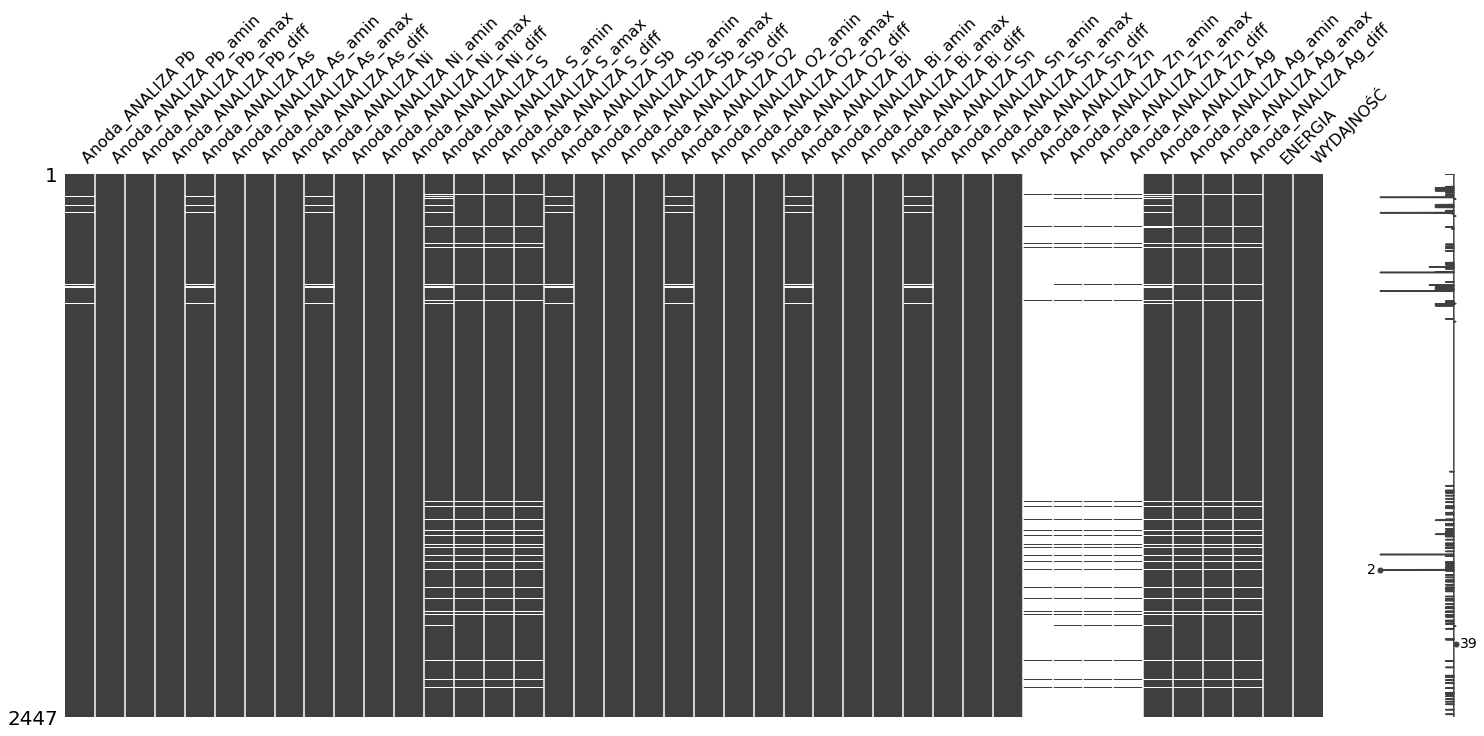

In [7]:
msno.matrix(quality_dataset.loc[:,quality_dataset.isnull().any()])
plt.show()

Wartości brakujące pojawiają się w tym samym okresie.\
Inną zależnością jest to, że jeśli wartość pojawia się dla **Zn** (Cynk) to nie ma wartości w **S** (siarka) oraz **Ag** (Srebro).\
Sprawdźmy korelację pomiędzy tymi brakami.

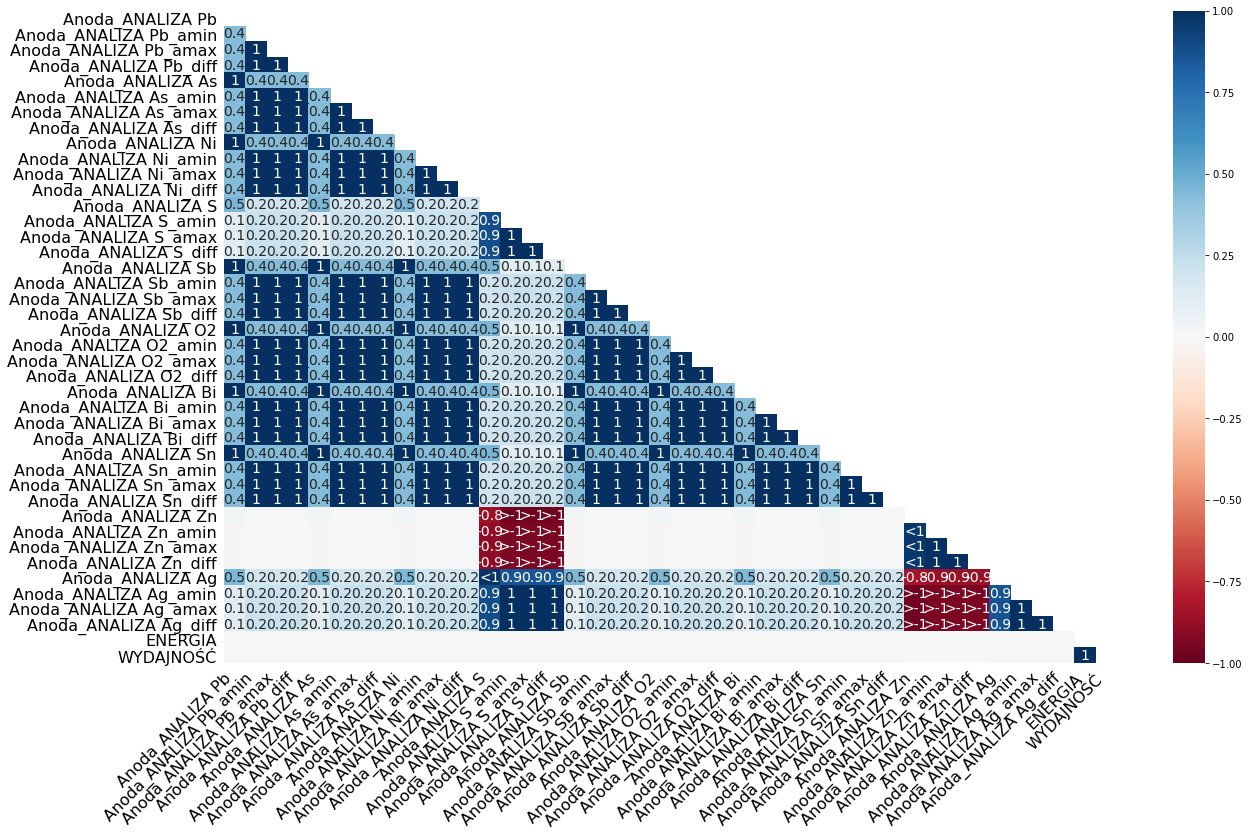

In [8]:
msno.heatmap(quality_dataset.loc[:,quality_dataset.isnull().any()])
plt.show()

Jest tak dlatego, że są to anody HL:

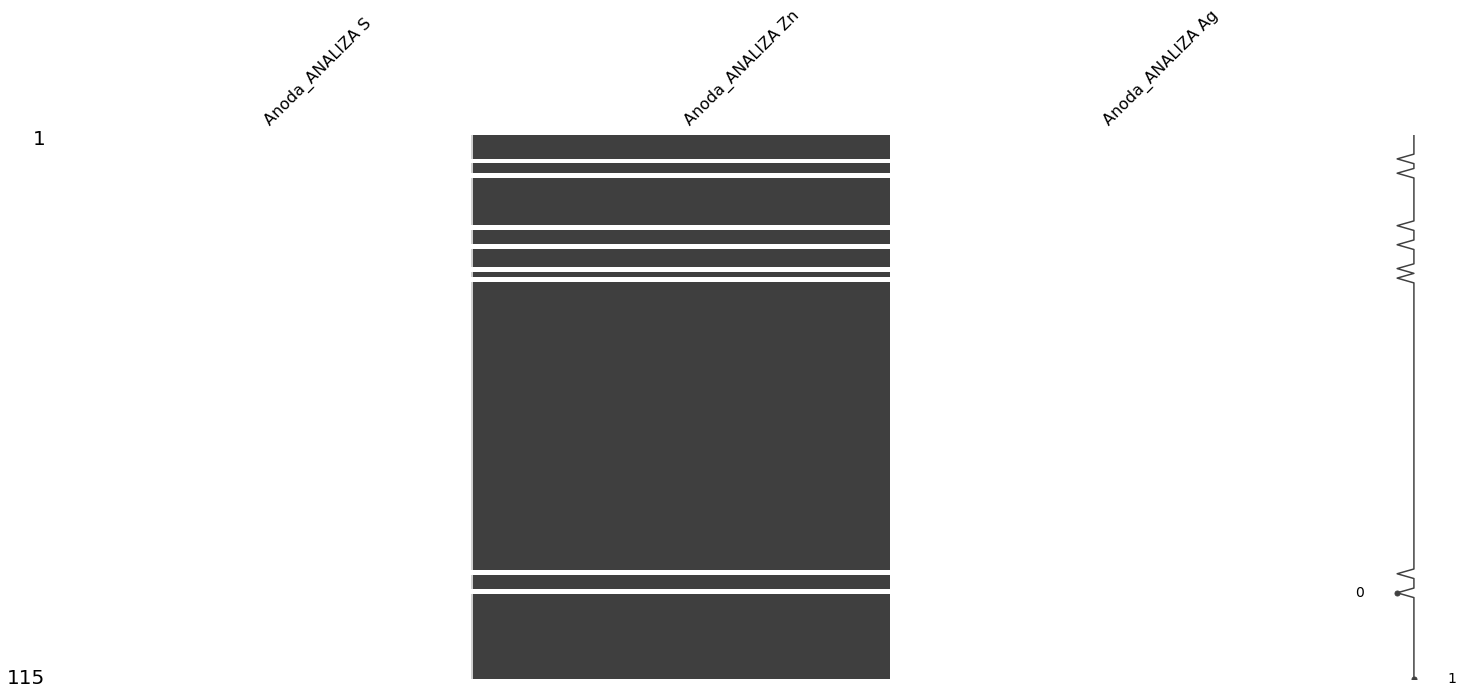

In [9]:
msno.matrix(quality_dataset.loc[quality_dataset['HL']==1,['Anoda_ANALIZA S', 'Anoda_ANALIZA Zn', 'Anoda_ANALIZA Ag']])
plt.show()

Dla **HL** również pojawiają się braki.
##### To do: Usunięcie *Zn*, pozostałe braki uzupełnić statystyką.

#### Sprawdzenie podstawowych statystyk zmiennych dla zmiennych objaśnianych i sprawdzenie od czego są zależne

### Liczba wyprodukowanych katod

In [10]:
quality_dataset[y_klasyfikacja].describe()

,Klasyfikacja_HMG-S,Klasyfikacja_Cu-CATH 1 Z,Klasyfikacja_Cu-CATH 2,Klasyfikacja_niesklasyfikowane
count,2447.000000,2447.000000,2447.000000,2447.000000
mean,41.780139,0.094401,1.756028,0.117286
std,4.481803,1.533650,2.687404,0.981709
min,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,1.000000,0.000000
50%,41.000000,0.000000,1.000000,0.000000
75%,45.000000,0.000000,2.000000,0.000000
max,53.000000,43.000000,47.000000,46.000000


Zazwyczaj niewiele produkowaliśmy katod z poza **Klasyfikacja_HMG-S**, jednak pojawiają się tam też wysokie wartości - **te sytuacje powinniśmy minimalizować**, warto stwierdzić też, że sytuacje te są **rzadkie**.

Sprawdzenie procenta wartości większych od 0 dla każdej z klas katod:

In [11]:
for typ_katod in y_klasyfikacja:
    print(typ_katod)
    print(np.round((quality_dataset[quality_dataset[typ_katod]>0].shape[0]/quality_dataset.shape[0])*100, 2), '%')
    print()

Klasyfikacja_HMG-S
99.96 %

Klasyfikacja_Cu-CATH 1 Z
0.9 %

Klasyfikacja_Cu-CATH 2
82.02 %

Klasyfikacja_niesklasyfikowane
9.36 %



Zadanie będziemy rozpatrywać w problemie regresji, niemniej jeśli chcielibyśmy nauczyć model klasyfikować czy będzie z jakiegoś typu katoda to powinniśmy zbilansować zbiór. Dlatego też będziemy uczyć modele dla **Cu_Cath 1** oraz **Klasyfikacja_niesklasyfikowane** na zbilansowanym zbiorze.

#### Boxploty oraz rozkłady zmiennych

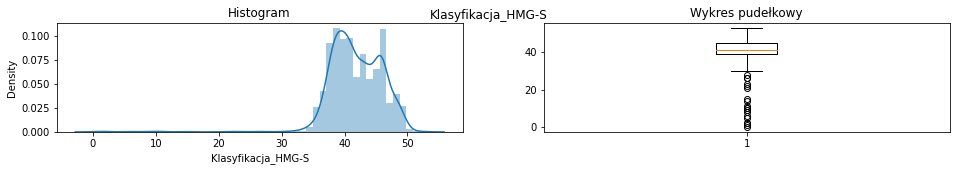

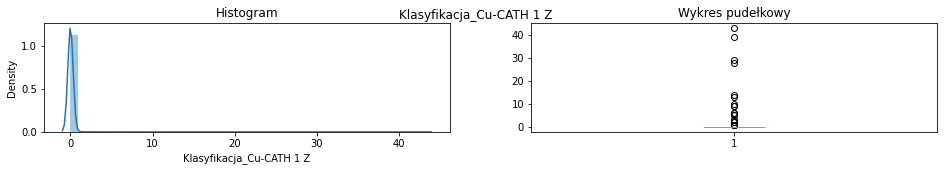

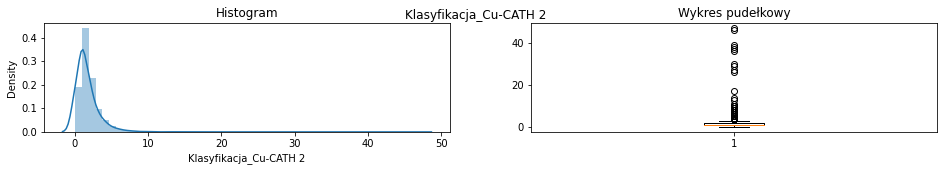

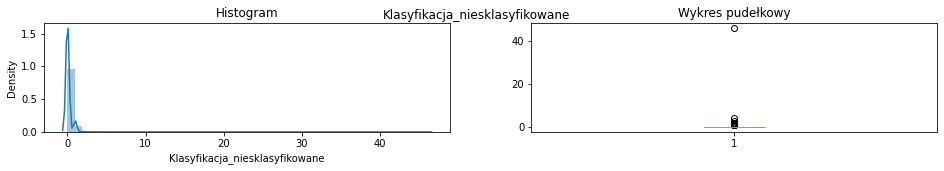

In [12]:
for typ_katod in y_klasyfikacja:
    fig = plt.figure(figsize=(16, 2))
    fig.suptitle(typ_katod, fontsize=12)
    plt.subplot(121)
    sns.distplot(quality_dataset[typ_katod], kde=True, rug=False, label=typ_katod)
    plt.title('Histogram')
    plt.subplot(122)
    plt.boxplot(quality_dataset[typ_katod])
    plt.title('Wykres pudełkowy')
    plt.show()

#### Sprawdzenie czy jest zależność od zmiennych kategorycznych.

In [13]:
quality_categoric_features = ['Grupa_wanien', 'Obieg_cyrkulacyjny_elekrolitu', 'Obwod_pradowy', 'CYKL', 'HMG', 'HL']

---------------------------Zależność Klasyfikacja_HMG-S od zmiennych kategorycznych---------------------------


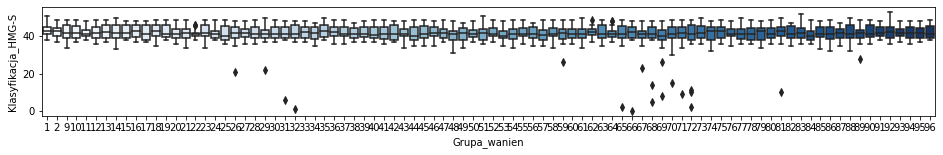

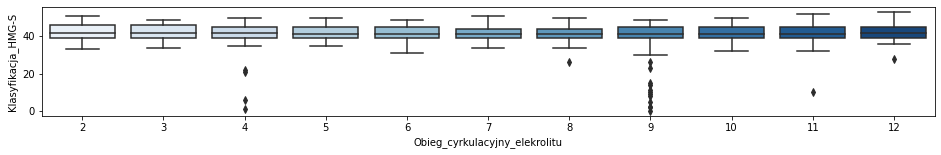

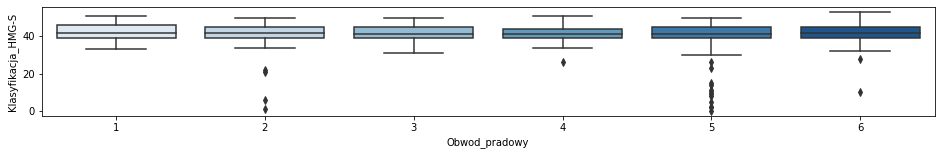

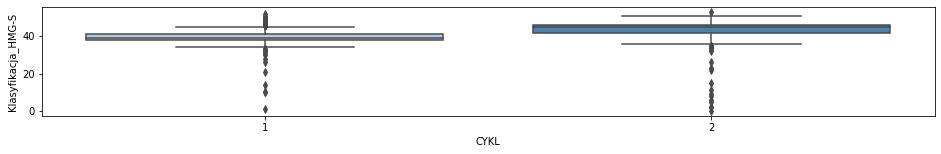

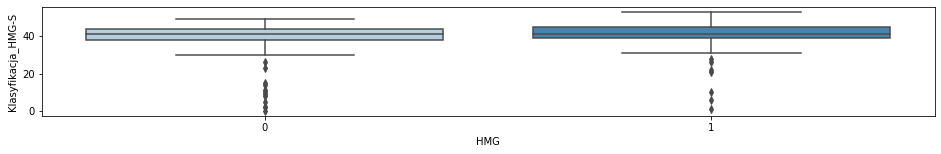

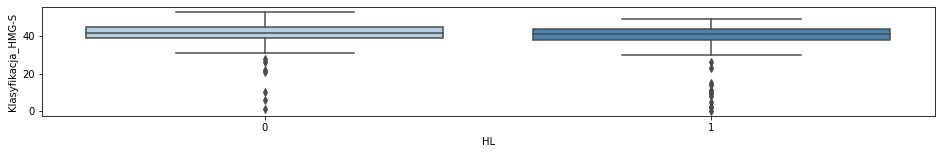


---------------------------Zależność Klasyfikacja_Cu-CATH 1 Z od zmiennych kategorycznych---------------------------


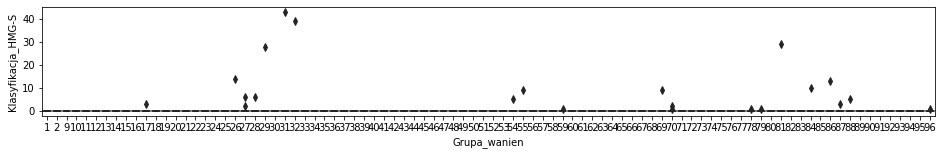

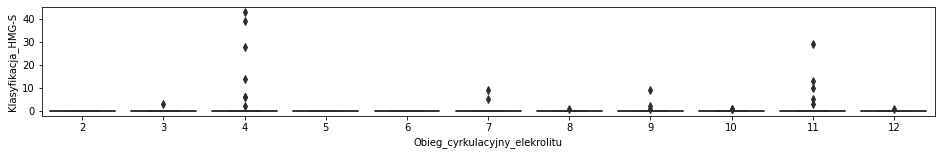

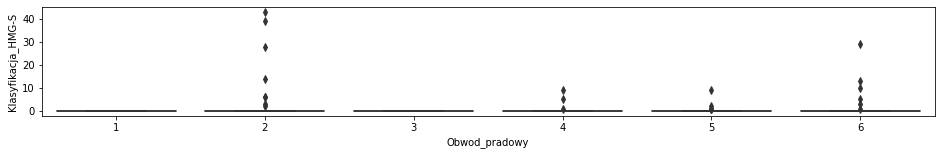

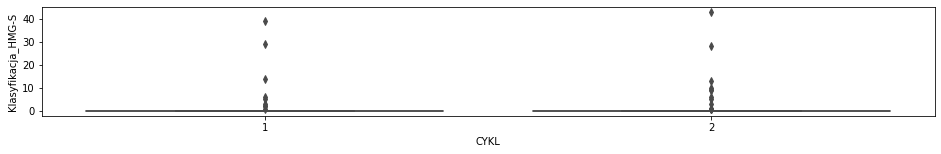

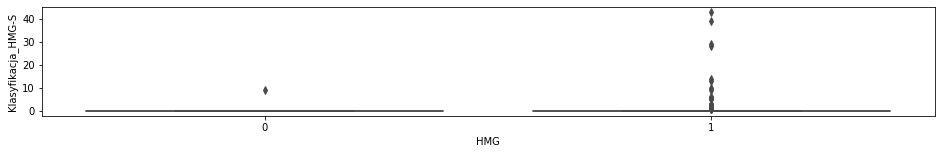

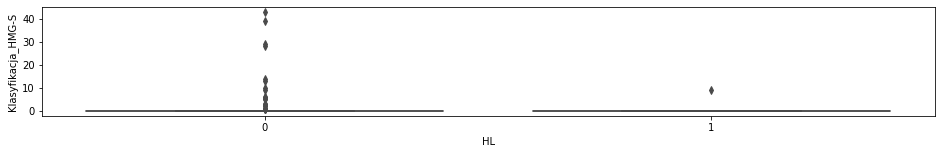


---------------------------Zależność Klasyfikacja_Cu-CATH 2 od zmiennych kategorycznych---------------------------


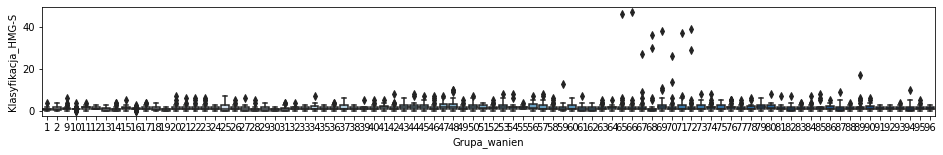

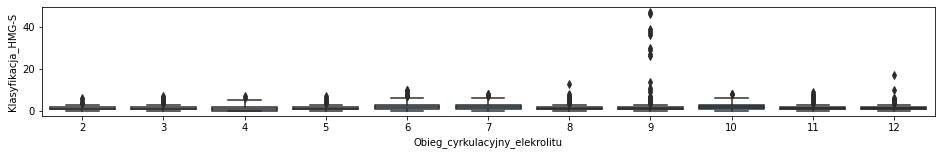

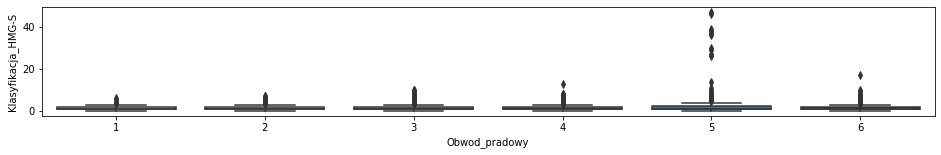

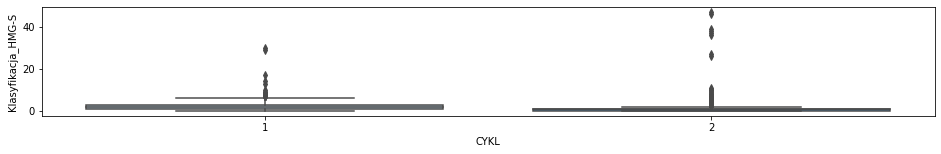

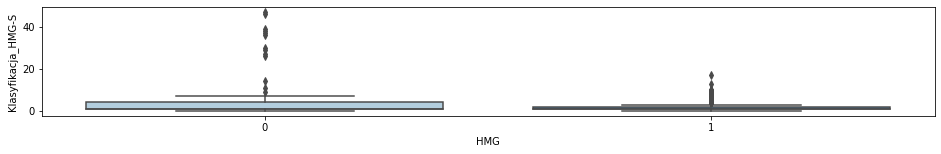

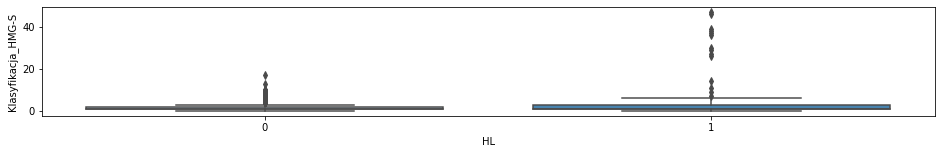


---------------------------Zależność Klasyfikacja_niesklasyfikowane od zmiennych kategorycznych---------------------------


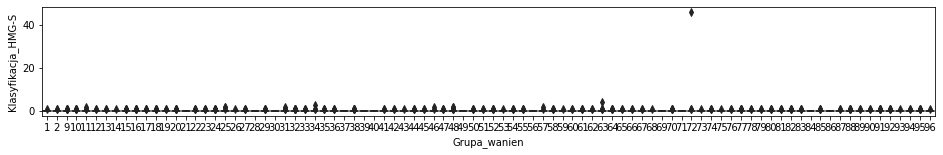

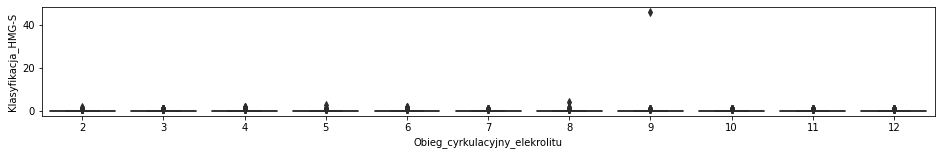

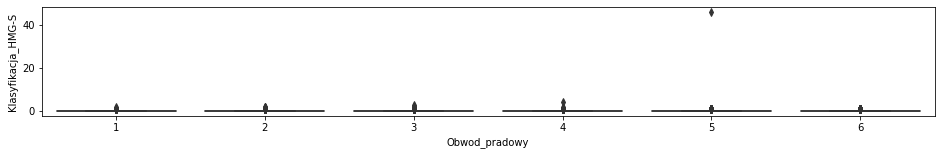

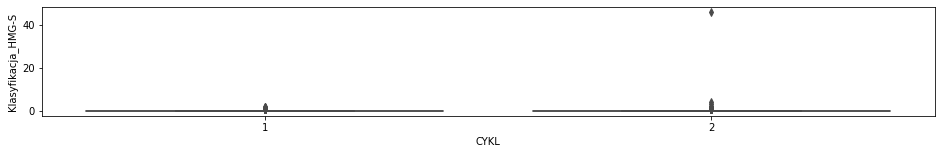

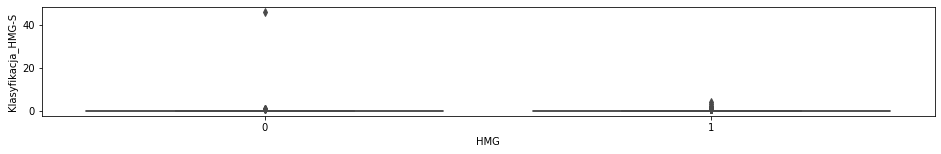

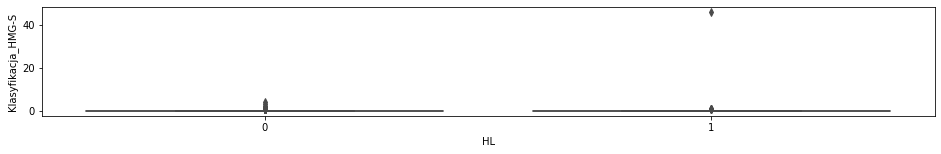

In [14]:
for typ_katod in y_klasyfikacja:
    print(f'---------------------------Zależność {typ_katod} od zmiennych kategorycznych---------------------------')
    for variable in quality_categoric_features:
        plt.figure(figsize=(16, 2))
        sns.boxplot(x=variable, y=typ_katod, data=quality_dataset, palette="Blues")
        plt.xlabel(variable)
        plt.ylabel('Klasyfikacja_HMG-S')
        plt.show()
    print()

Sprawdźmy jeszcze współczynnki korelacji pomiędzy zmienną numeryczną a zmienną kategoryczną.

In [15]:
for typ_katod in y_klasyfikacja:
    print(f'---------------------------Zależność {typ_katod} od zmiennych kategorycznych---------------------------')
    corr_dict = {}
    for variable in quality_categoric_features:
        corr_dict[variable] = stats.pointbiserialr(quality_dataset[variable], quality_dataset[typ_katod])[0]
        series_corr_categorical = pd.Series(corr_dict).sort_values(ascending=False)
    series_corr_categorical = series_corr_categorical[(series_corr_categorical>0.1)|(series_corr_categorical<-0.1)]
    display(series_corr_categorical)

---------------------------Zależność Klasyfikacja_HMG-S od zmiennych kategorycznych---------------------------


CYKL    0.474579
HMG     0.175521
HL     -0.173549
dtype: float64

---------------------------Zależność Klasyfikacja_Cu-CATH 1 Z od zmiennych kategorycznych---------------------------


Series([], dtype: float64)

---------------------------Zależność Klasyfikacja_Cu-CATH 2 od zmiennych kategorycznych---------------------------


HL      0.263801
CYKL   -0.178820
HMG    -0.273223
dtype: float64

---------------------------Zależność Klasyfikacja_niesklasyfikowane od zmiennych kategorycznych---------------------------


Series([], dtype: float64)

Na koniec sprawdźmy jeszcze rozkłady dla **Klasyfikacja_HMG-S** w zależności od cyklu oraz czy jest to źródło **HMG**.

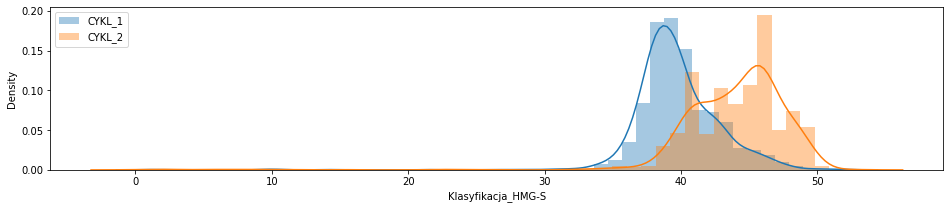

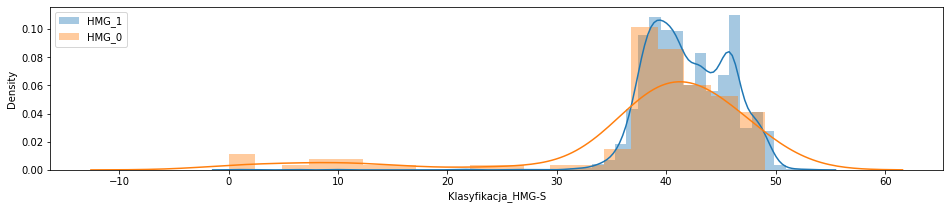

In [16]:
for variable in ['CYKL', 'HMG']:
    plt.figure(figsize=(16, 3))
    for unique_value in quality_dataset[variable].unique():
        sns.distplot( quality_dataset.loc[quality_dataset[variable]==unique_value, 'Klasyfikacja_HMG-S'],
                     label=f'{variable}_{unique_value}')
    plt.legend(loc='upper left')
    plt.show()

Co wynika z powyższych wykresów od zmiennych kategorycznych:
- widać, że wartości odstające są najbardziej widoczne na poziomie obwodu prądowego, jednak to może nie wynikać z konkretnego obwodu, a jednak wartości prądu.
- największy wpływ widoczny jest dla cyklu, oraz źródła anod.

#### Sprawdzenie czy jest zależność od zmiennych numerycznych

In [17]:
quality_numeric_features = list(quality_dataset.loc[:, 'Anoda_ANALIZA Pb':'Anoda_ANALIZA Ag_diff'].columns)+['Czas_h']

Stworzyliśmy wiele zmiennych, do wstępnej selekcji oraz eksploracji użyjemy metryki agregującej, jaką jest **korelacja Pearsona**. Sprawdzemy jedynie korelacje wyższe i niższe niż 0.1. Zostało to wykonane arbitralnie, kontynuując wdrożenie powinniśmy traktować to również jako hiperparametr.

Klasyfikacja_HMG-S
Index(['Anoda_ANALIZA As', 'Anoda_ANALIZA As_amin', 'Anoda_ANALIZA As_amax',
       'Anoda_ANALIZA Ni', 'Anoda_ANALIZA Ni_amin', 'Anoda_ANALIZA Bi',
       'Anoda_ANALIZA Bi_amin', 'Anoda_ANALIZA Bi_amax', 'Anoda_ANALIZA Sn',
       'Anoda_ANALIZA Sn_amax', 'Anoda_ANALIZA Zn', 'Anoda_ANALIZA Zn_amin',
       'Czas_h', 'Klasyfikacja_HMG-S'],
      dtype='object')


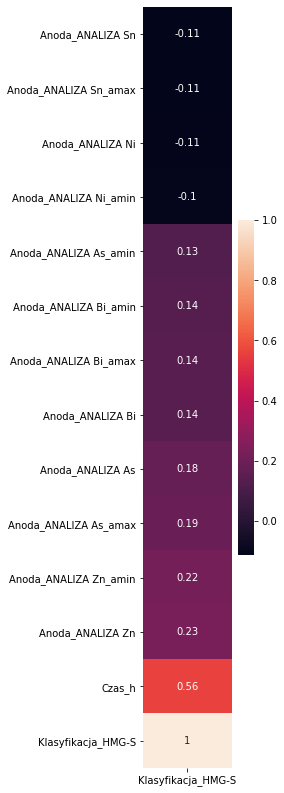

Klasyfikacja_Cu-CATH 1 Z
Index(['Klasyfikacja_Cu-CATH 1 Z'], dtype='object')


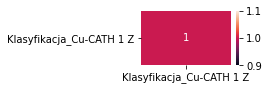

Klasyfikacja_Cu-CATH 2
Index(['Anoda_ANALIZA As', 'Anoda_ANALIZA As_amin', 'Anoda_ANALIZA As_amax',
       'Anoda_ANALIZA Ni', 'Anoda_ANALIZA Ni_amin', 'Anoda_ANALIZA Ni_amax',
       'Anoda_ANALIZA Bi', 'Anoda_ANALIZA Bi_amin', 'Anoda_ANALIZA Bi_amax',
       'Anoda_ANALIZA Sn', 'Anoda_ANALIZA Sn_amin', 'Anoda_ANALIZA Sn_amax',
       'Anoda_ANALIZA Sn_diff', 'Anoda_ANALIZA Zn', 'Anoda_ANALIZA Zn_amin',
       'Klasyfikacja_Cu-CATH 2'],
      dtype='object')


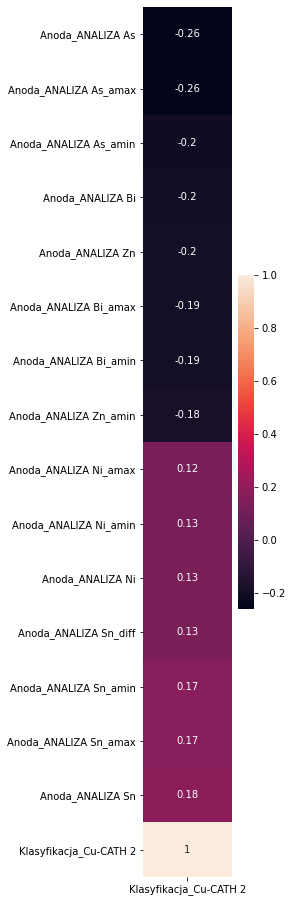

Klasyfikacja_niesklasyfikowane
Index(['Anoda_ANALIZA As_amax', 'Anoda_ANALIZA Zn', 'Anoda_ANALIZA Zn_amin',
       'Klasyfikacja_niesklasyfikowane'],
      dtype='object')


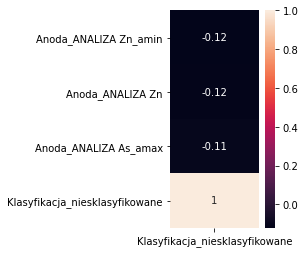

In [18]:
for typ_katod in y_klasyfikacja:
    high_correlations = (
        (quality_dataset[quality_numeric_features+[typ_katod]].corr()[typ_katod]>0.1)|\
        (quality_dataset[quality_numeric_features+[typ_katod]].corr()[typ_katod]<-0.1)
    )
    high_correlations = high_correlations[high_correlations==True].index
    print(typ_katod)
    print(high_correlations)
    plt.figure(figsize = (2, len(high_correlations)))
    sns.heatmap(pd.DataFrame(quality_dataset[high_correlations].corr()[typ_katod].sort_values()), annot = True)
    plt.yticks(rotation=0)
    plt.show()

Wnioski na podstawie poszczególnych klas katod:
- **Klasyfikacja_HMG-S** - **Negatywnie** skorelowane **Sn** oraz **Ni**, zaś pozytywnie **As**, **Bi** oraz **Zn** (jednak te dane są zbyt rzadkie, docelowo ta kategoria będzie usunięta). Mocno skorelowany jest czas. Mocno skorelowany jest również **czas**, jednak on wynika z cyklu i nie będzie możliwości nim manipulować aby otrzymać najlepszej jakości katody.
- **Klasyfikacja_Cu-CATH 1 Z** - brak skorelowanych zmiennych
- **Klasyfikacja_Cu-CATH 2** - skorelowane **As**, **Bi**, **Zn** (nie będzie wykorzystywany), **Ni**, **Sn**
- **Klasyfikacja_niesklasyfikowane** - skorelowane **Zn* oraz **As**


Skorelowane zmienna się potwarzają, a zatem na podstawie tej analizy wynika, aby wykorzystać **As**, **Bi**, **Zn**, **Ni**, **Sn**, wzięty również powinien być **czas**, jednak nie będzie można nim manipulować.

### Analiza jakości katod
Dla przypomnienia dopuszczalne wartości zanieczyszczeń:
<img src="dane/images/dopuszczalne_zanieczyszczenia_img.PNG" width=400 />

In [19]:
# Dodaje 0.5, poniewaz dopuszczalne zawartosci zanieczyszczen sa wtedy zaokraglane w dol
dopuszczalne_wartosci_katod = {'Katoda_ANALIZA Pb': 1.5,
                               'Katoda_ANALIZA Fe': 2.5,
                               'Katoda_ANALIZA Ni': 2.5,
                               'Katoda_ANALIZA Zn': 1.5,
                               'Katoda_ANALIZA S': 4.5,
                               'Katoda_ANALIZA Ag': 10.5}
dopuszczalne_wartosci_katod

{'Katoda_ANALIZA Pb': 1.5,
 'Katoda_ANALIZA Fe': 2.5,
 'Katoda_ANALIZA Ni': 2.5,
 'Katoda_ANALIZA Zn': 1.5,
 'Katoda_ANALIZA S': 4.5,
 'Katoda_ANALIZA Ag': 10.5}

In [20]:
quality_dataset[y_analiza].describe()

,Katoda_ANALIZA Pb,Katoda_ANALIZA Fe,Katoda_ANALIZA Ni,Katoda_ANALIZA Zn,Katoda_ANALIZA S,Katoda_ANALIZA Ag
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,1.027054,1.419943,0.999183,1.326890,4.508418,8.269514
std,0.178126,0.173284,0.028583,0.189989,0.917805,1.915947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.400000,1.000000,1.200000,3.900000,6.700000
50%,1.000000,1.400000,1.000000,1.200000,4.400000,8.000000
75%,1.000000,1.400000,1.000000,1.400000,4.900000,9.700000
max,4.000000,4.200000,1.000000,3.100000,11.000000,14.400000


Jedynie wartości **Ni** nigdy nie przekroczyły wartości dopuszczalnych. Jeszcze zajmiemy się tymi wartościami.

Sprawdzenie jaka część analizowanych pierwiatków była niższa/równa niż wartość dopuszczalna:

In [21]:
for typ_analiza in y_analiza:
    print(typ_analiza)
    print(np.round((quality_dataset[quality_dataset[typ_analiza]<dopuszczalne_wartosci_katod[typ_analiza]].shape[0]/\
                    quality_dataset.shape[0])*100, 2), '%')
    print()

Katoda_ANALIZA Pb
97.83 %

Katoda_ANALIZA Fe
99.31 %

Katoda_ANALIZA Ni
100.0 %

Katoda_ANALIZA Zn
80.63 %

Katoda_ANALIZA S
54.72 %

Katoda_ANALIZA Ag
85.0 %



Najtrudniejsze zadanie wydaje się być z pierwiastkami **Zn**, **S** oraz **Ag**.

#### Boxploty oraz rozkłady zmiennych
Na rozkładach naniesiona jest prosta odpowiadająca granicy dopuszczalnej

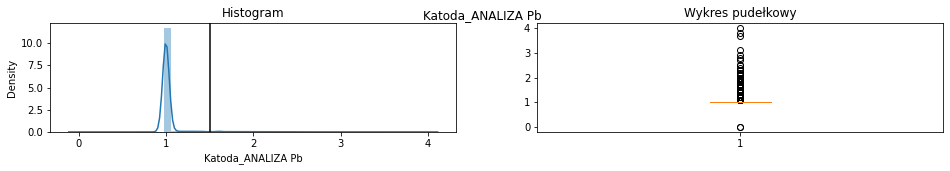

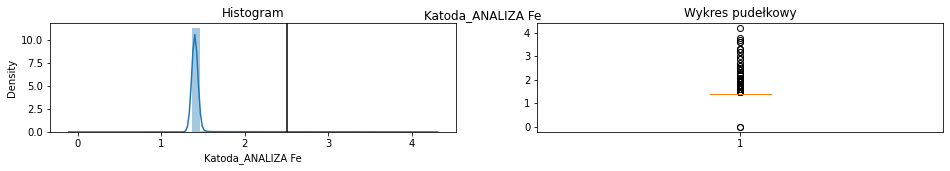

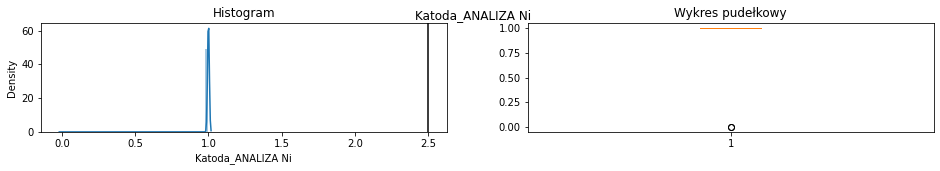

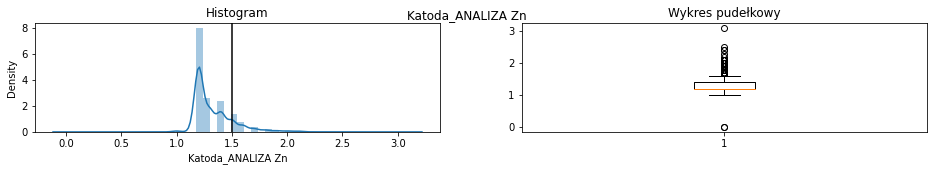

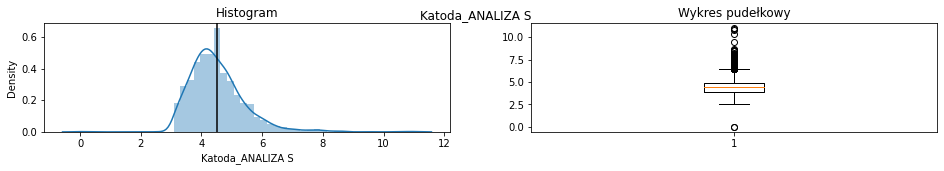

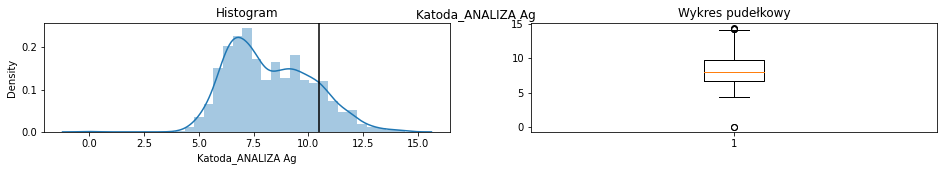

In [22]:
for typ_analiza in y_analiza:
    fig = plt.figure(figsize=(16, 2))
    fig.suptitle(typ_analiza, fontsize=12)
    plt.subplot(121)
    sns.distplot(quality_dataset[typ_analiza], kde=True, rug=False, label=typ_katod)
    plt.axvline(dopuszczalne_wartosci_katod[typ_analiza], color='black')
    plt.title('Histogram')
    plt.subplot(122)
    plt.boxplot(quality_dataset[typ_analiza])
    plt.title('Wykres pudełkowy')
    plt.show()

Możemy zweryfikować prblemy, a dokładnie największy problem jest z wartościami granicznymi dla **Zn**, **S** oraz **Ag**.

#### Sprawdzenie czy jest zależność od zmiennych kategorycznych.
Analizowanych parametrów katod jest więcej niż rodzajów katod, zatem weryfikujemy współczynnki korelacji pomiędzy zmienny numerycznymi (analiza katod) a zmiennymi kategorycznymi.

In [23]:
for typ_analiza in y_analiza:
    print(f'---------------------------Zależność {typ_analiza} od zmiennych kategorycznych---------------------------')
    corr_dict = {}
    for variable in quality_categoric_features:
        corr_dict[variable] = stats.pointbiserialr(quality_dataset[variable], quality_dataset[typ_analiza])[0]
        series_corr_categorical = pd.Series(corr_dict).sort_values(ascending=False)
    series_corr_categorical = series_corr_categorical[(series_corr_categorical>0.1)|(series_corr_categorical<-0.1)]
    display(series_corr_categorical)

---------------------------Zależność Katoda_ANALIZA Pb od zmiennych kategorycznych---------------------------


Series([], dtype: float64)

---------------------------Zależność Katoda_ANALIZA Fe od zmiennych kategorycznych---------------------------


Series([], dtype: float64)

---------------------------Zależność Katoda_ANALIZA Ni od zmiennych kategorycznych---------------------------


Series([], dtype: float64)

---------------------------Zależność Katoda_ANALIZA Zn od zmiennych kategorycznych---------------------------


Series([], dtype: float64)

---------------------------Zależność Katoda_ANALIZA S od zmiennych kategorycznych---------------------------


CYKL   -0.105776
dtype: float64

---------------------------Zależność Katoda_ANALIZA Ag od zmiennych kategorycznych---------------------------


CYKL    0.717397
HMG     0.135859
HL     -0.133967
dtype: float64

Znacząca korelacja pojawiła się pomiędzy analizowaną **Ag** oraz **cyklem** i **źródłem**, jak i pomiędzy **S** oraz **cyklem**.

Sprawdźmy rozkład **Ag** od **cyklu**.

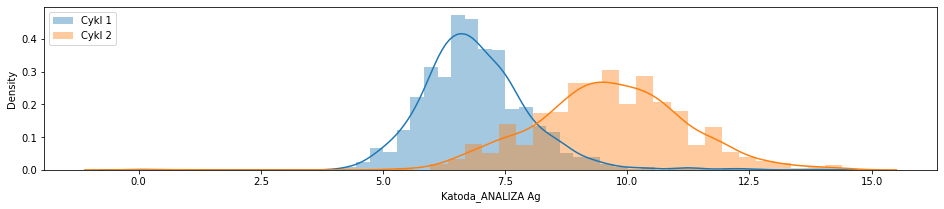

In [24]:
plt.figure(figsize=(16, 3))
sns.distplot(quality_dataset.loc[quality_dataset['CYKL']==1, 'Katoda_ANALIZA Ag'], label='Cykl 1')
sns.distplot(quality_dataset.loc[quality_dataset['CYKL']==2, 'Katoda_ANALIZA Ag'], label='Cykl 2')
plt.legend(loc='upper left')
plt.show()

#### Sprawdzenie czy jest zależność od zmiennych numerycznych

Katoda_ANALIZA Pb
Index(['Katoda_ANALIZA Pb'], dtype='object')


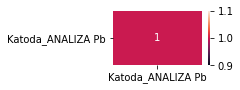

Katoda_ANALIZA Fe
Index(['Anoda_ANALIZA Zn', 'Katoda_ANALIZA Fe'], dtype='object')


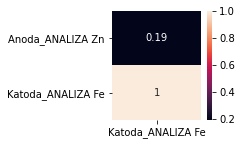

Katoda_ANALIZA Ni
Index(['Anoda_ANALIZA S_amin', 'Katoda_ANALIZA Ni'], dtype='object')


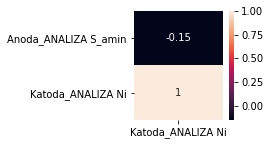

Katoda_ANALIZA Zn
Index(['Anoda_ANALIZA Zn', 'Anoda_ANALIZA Zn_amax', 'Anoda_ANALIZA Zn_diff',
       'Katoda_ANALIZA Zn'],
      dtype='object')


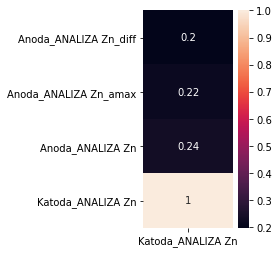

Katoda_ANALIZA S
Index(['Katoda_ANALIZA S'], dtype='object')


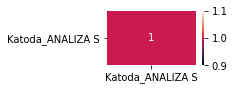

Katoda_ANALIZA Ag
Index(['Anoda_ANALIZA As', 'Anoda_ANALIZA As_amin', 'Anoda_ANALIZA Bi',
       'Anoda_ANALIZA Bi_amin', 'Anoda_ANALIZA Bi_amax', 'Anoda_ANALIZA Zn',
       'Anoda_ANALIZA Ag', 'Anoda_ANALIZA Ag_amin', 'Czas_h',
       'Katoda_ANALIZA Ag'],
      dtype='object')


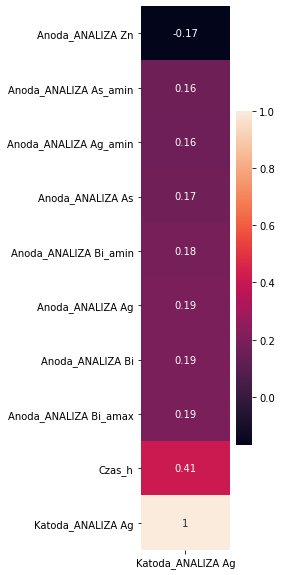

In [25]:
for typ_analiza in y_analiza:
    high_correlations = (
        (quality_dataset[quality_numeric_features+[typ_analiza]].corr()[typ_analiza]>0.15)|\
        (quality_dataset[quality_numeric_features+[typ_analiza]].corr()[typ_analiza]<-0.15)
    )
    high_correlations = high_correlations[high_correlations==True].index
    print(typ_analiza)
    print(high_correlations)
    plt.figure(figsize = (2, len(high_correlations)))
    sns.heatmap(pd.DataFrame(quality_dataset[high_correlations].corr()[typ_analiza].sort_values()), annot = True)
    plt.yticks(rotation=0)
    plt.show()

Do analizowania **Ni należałoby wykorzystać S_amin.
Do analizowania Ag należy wykorzystać As, Ag, Bi oraz czas (tym nie mozna manipulowac).

## Eksploracja danych procesowych

#### Sprawdzenie zawartości zbioru danych

In [26]:
process_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661038 entries, 0 to 661037
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Data                           661038 non-null  datetime64[ns]
 1   Grupa_wanien                   661038 non-null  int64         
 2   Obieg_cyrkulacyjny_elekrolitu  661038 non-null  int64         
 3   Obwod_pradowy                  661038 non-null  int64         
 4   Temp_naporowe                  660882 non-null  float64       
 5   Temp_cyrkulacyjne              660882 non-null  float64       
 6   Poziom_naporowe                660882 non-null  float64       
 7   Poziom_cyrkulacyjne            660882 non-null  float64       
 8   kwas [m3]                      661033 non-null  float64       
 9   Kondensat [m3]                 661033 non-null  float64       
 10  Elektrolit [m3]                661033 non-null  float64       
 11  

#### Sprawdzenie wartości brakujących - czy jest tu pewna zależność

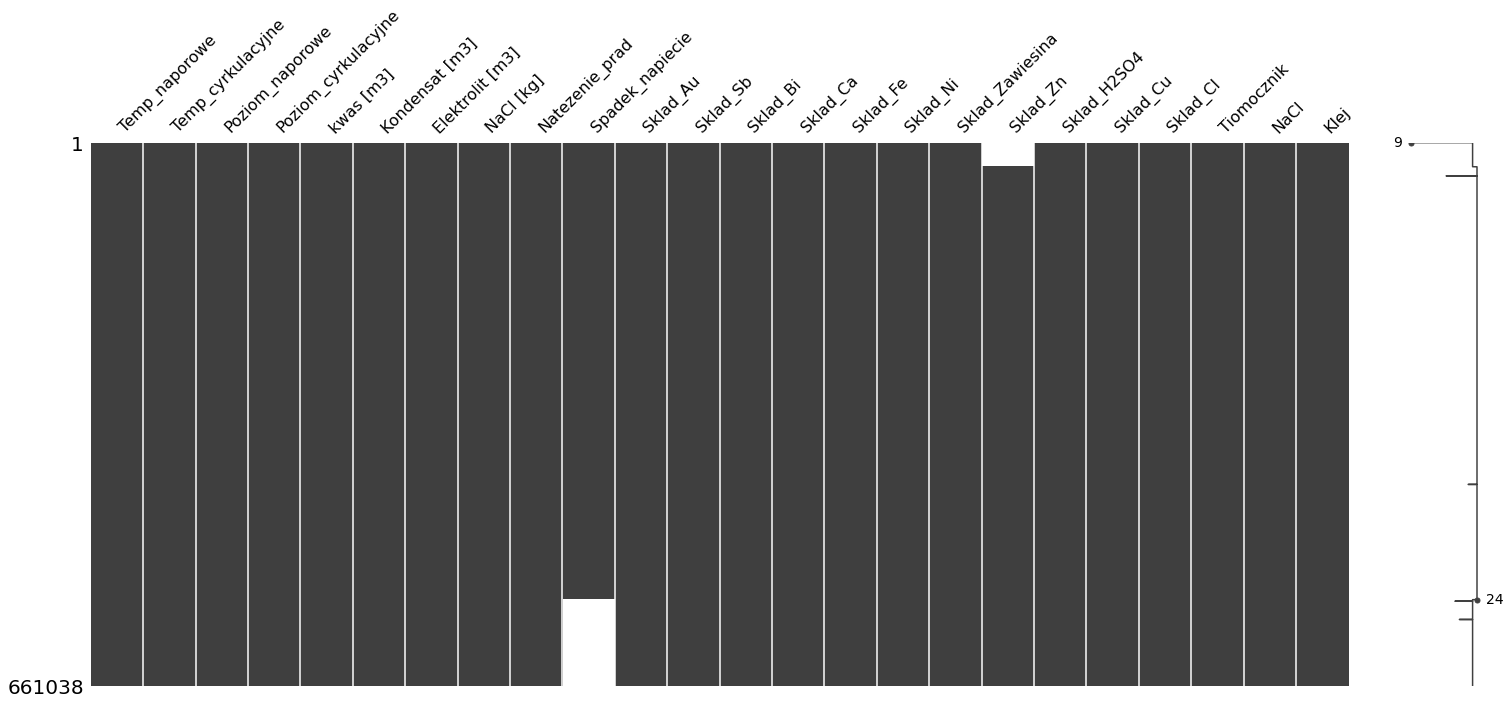

In [27]:
msno.matrix(process_dataset.loc[:,process_dataset.isnull().any()])
plt.show()

Są również braki niewidoczne na wykresie, jednak w większości są w niewielkie te braki (niewidoczne) i z podobnych powodów, np. zmiana czasu. Na wykresie widać jeden główny brak - Spadek napięcia dla ostatnich dat oraz Sklad elektrolitu Zn dla pierwszych dat.

Decyzja o uzupełnienie braków podjęta zostanie na etapie modelowania.

Zmienne numeryczne ze zbioru które mogą mieć wpływ na szukane

In [28]:
process_numeric_features = list(process_dataset.loc[:, 'Temp_naporowe':'Klej'].columns)

#### Sprawdzenie rozkładu zmiennych numerycznych

In [29]:
process_dataset[process_numeric_features].describe()

,Temp_naporowe,Temp_cyrkulacyjne,Poziom_naporowe,Poziom_cyrkulacyjne,kwas [m3],Kondensat [m3],Elektrolit [m3],NaCl [kg],Natezenie_prad,Spadek_napiecie,...,Sklad_Fe,Sklad_Ni,Sklad_Zawiesina,Sklad_Zn,Sklad_H2SO4,Sklad_Cu,Sklad_Cl,Tiomocznik,NaCl,Klej
count,660882.000000,660882.000000,660882.000000,660882.000000,661033.000000,661033.000000,661033.000000,661033.000000,660831.000000,555490.000000,...,661037.000000,661037.000000,661037.000000,631721.000000,661037.000000,661037.000000,661037.000000,660884.000000,660884.000000,660884.000000
mean,60.171253,56.754129,74.944147,81.404032,1.796565,13.283992,11.407561,3.240023,13.011621,6.157239,...,0.095115,4.454190,0.002895,0.027539,169.478417,46.650365,0.038022,20.664984,20.432818,27.045994
std,1.084483,4.718461,2.205501,5.553202,1.780434,20.350244,30.308455,2.179644,0.803217,1.010665,...,0.013325,0.816864,0.002154,0.016683,5.803116,2.997864,0.015901,2.872443,14.069573,3.191529
min,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,-59.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.026000,0.010000,0.010000,0.010000
25%,59.784500,56.354317,74.993084,77.986716,0.000000,0.000000,-2.000000,1.000000,13.062000,5.561083,...,0.088000,4.020000,0.001200,0.021000,166.390000,44.390000,0.036000,19.280000,8.030000,26.760000
50%,60.124717,57.151383,74.998917,82.162784,1.000000,0.000000,0.000000,3.000000,13.137250,6.087222,...,0.095000,4.340000,0.002200,0.023000,169.620000,46.510000,0.038000,20.680000,20.760000,27.000000
75%,60.774417,57.931350,75.007667,85.301000,3.000000,20.000000,16.000000,5.000000,13.284250,6.836299,...,0.100000,4.670000,0.004000,0.026000,172.920000,48.740000,0.040000,22.000000,32.680000,27.220000
max,65.007600,65.214200,99.949767,105.732951,7.000000,80.000000,385.000000,13.600000,13.803750,10.468000,...,0.140000,8.940000,0.010200,0.140000,192.910000,56.770000,1.000000,50.100000,57.160000,50.110000


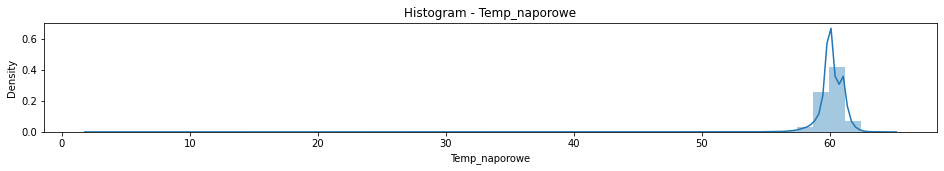

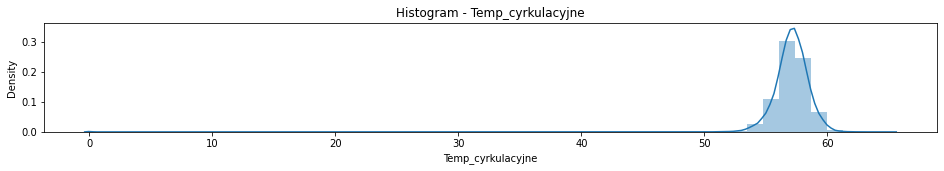

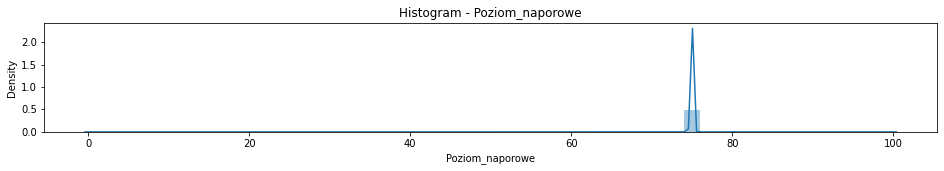

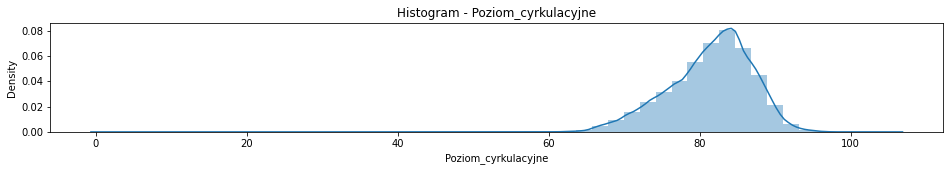

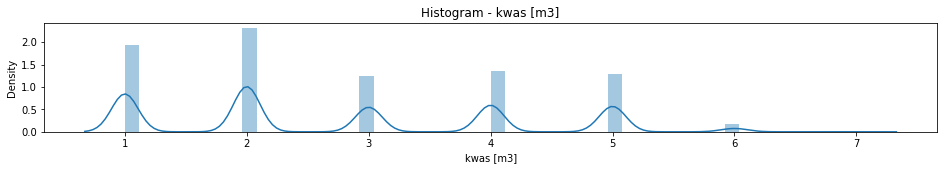

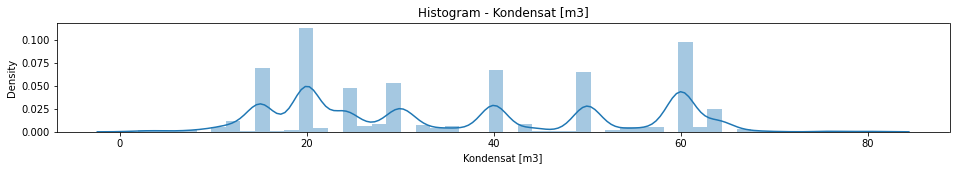

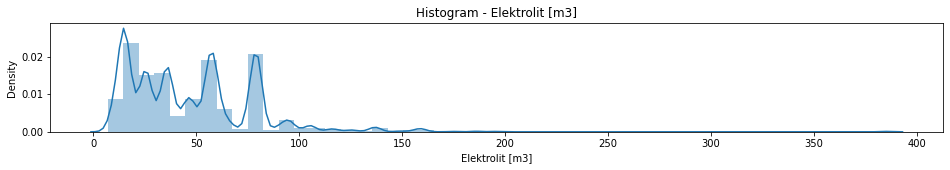

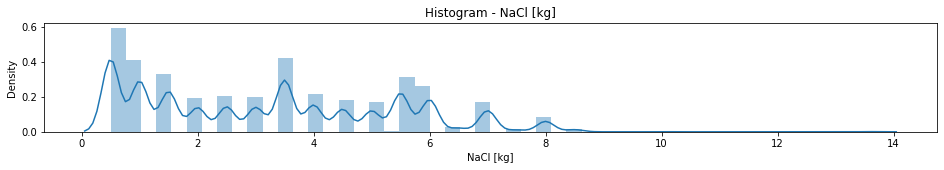

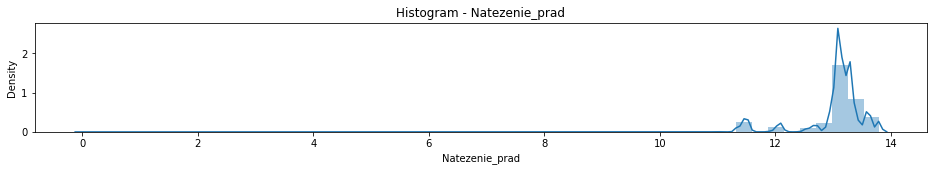

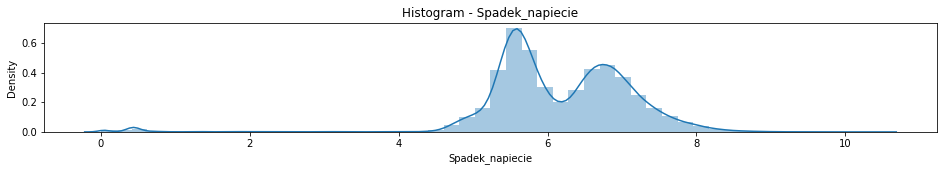

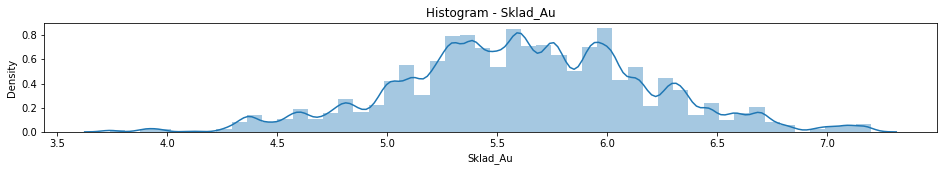

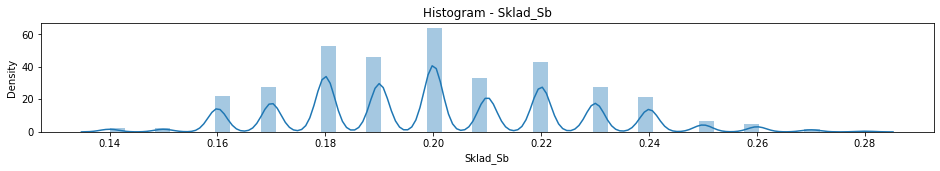

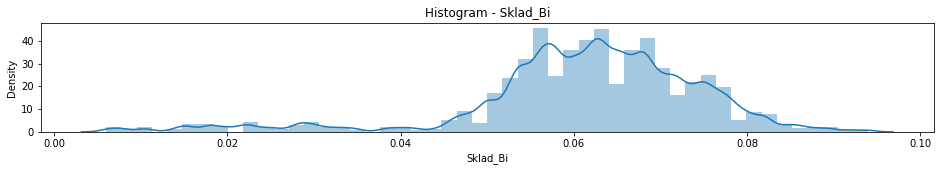

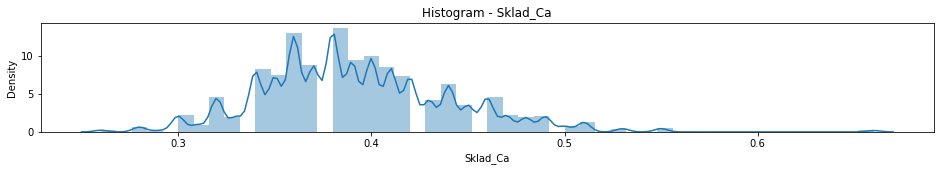

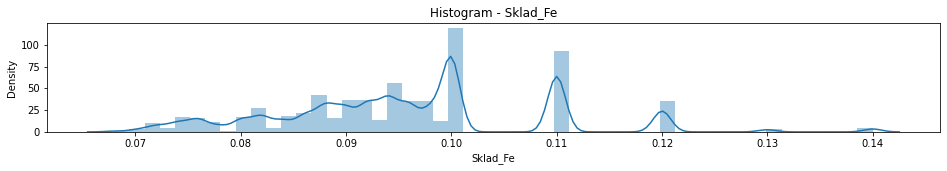

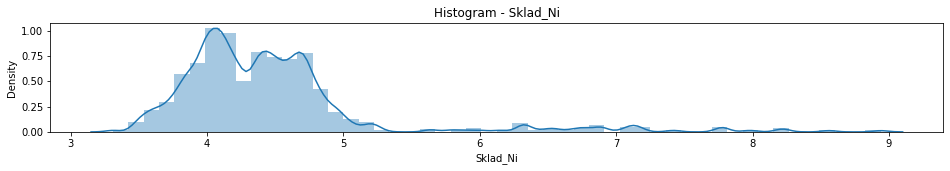

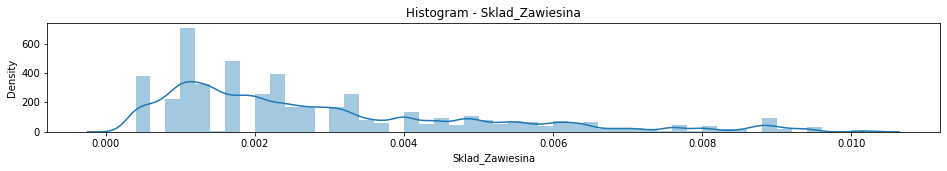

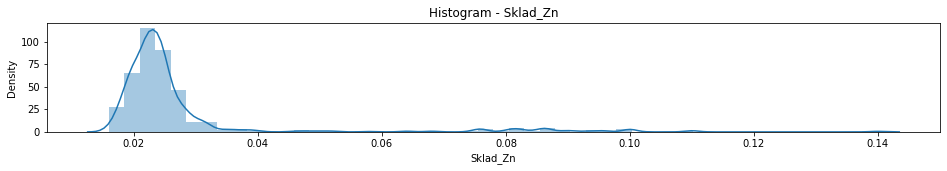

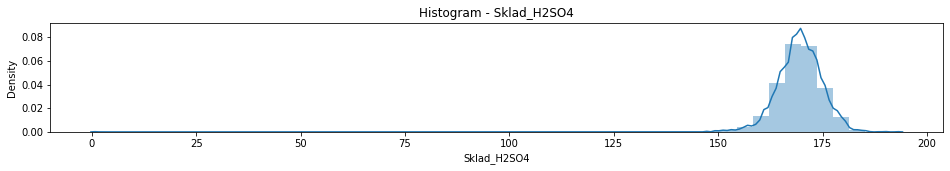

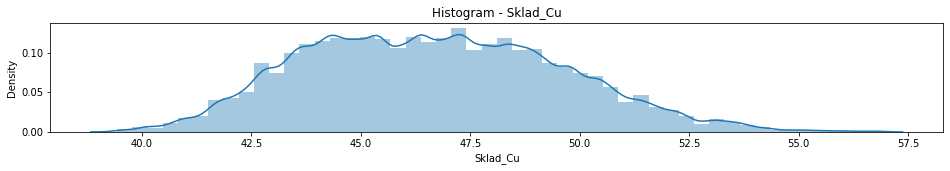

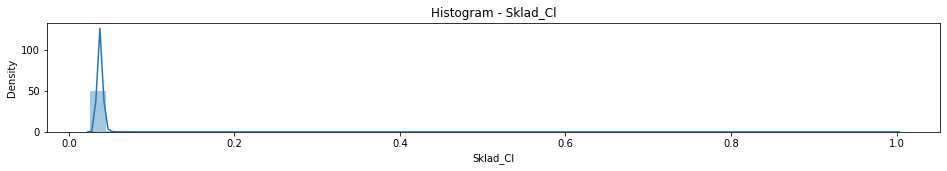

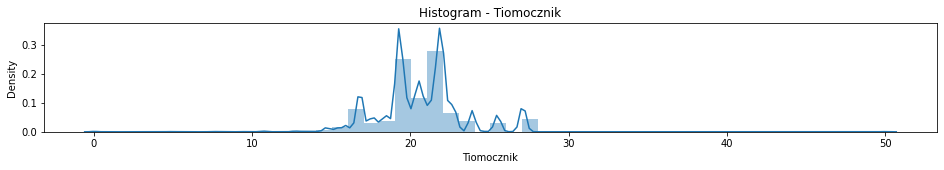

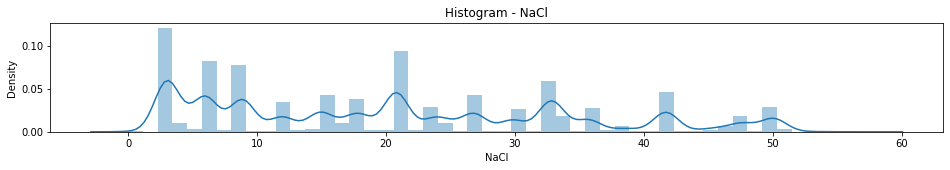

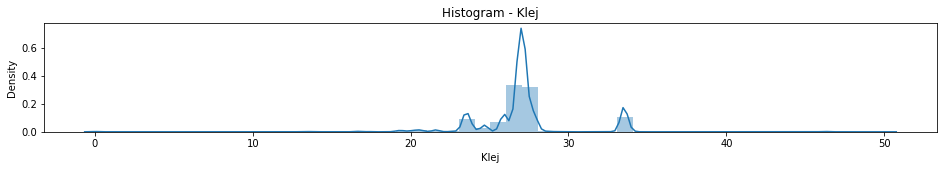

In [30]:
for quality_numeric_feature in process_numeric_features:
    fig = plt.figure(figsize=(16, 2))
    sns.distplot(process_dataset.loc[process_dataset[quality_numeric_feature]>0, quality_numeric_feature], 
                 kde=True, rug=False)
    plt.title(f'Histogram - {quality_numeric_feature}')
    plt.show()

#### Sprawdzenie korelacji względem zagregowanych danych

Oczywiście dane zawarte w zbiorze są kombinacjami wielu szeregów czasowych. Nie zamierzamy stosować sieci neuronowych, zależy nam na interpretowalności. Zamierzamy sprawdzić jak zachowują się zagregowane statystki. Ponadto taka interpretacja może być wykorzystana i kontynuowana w późniejszych rozwinięciach, zamiast pełnej agregacji wtedy można wykonać dzienną itd. Jednak możemy mieć do czynienia z klątwą wielowymiarowości, stąd też idea zagregowania danych z wykorzystaniem statystyk.

In [31]:
agg_dict_quality = {}
for quality_numeric_feature in process_numeric_features:
    agg_dict_quality[quality_numeric_feature] = [np.min, np.max, np.mean, np.std]
process_dataset_aggreagated = process_dataset.groupby(['index_process']).aggregate(agg_dict_quality)

# Połączenie nazw kolumn - obecnie MultiIndex
process_dataset_aggreagated.columns = ['_'.join(col) for col in process_dataset_aggreagated.columns.values]

# Dodanie zmiennych objaśnianych ~ y
process_dataset_aggreagated.reset_index(inplace=True)
process_dataset_aggreagated.to_csv('output/prepared_aggreagated_process_dataset.csv', index=False)
process_dataset_aggreagated = pd.merge(process_dataset_aggreagated, 
                                       quality_dataset[['index_process']+y_klasyfikacja+y_analiza], 
                                 how='left', on=['index_process'])

process_dataset_aggreagated

,index_process,Temp_naporowe_amin,Temp_naporowe_amax,Temp_naporowe_mean,Temp_naporowe_std,Temp_cyrkulacyjne_amin,Temp_cyrkulacyjne_amax,Temp_cyrkulacyjne_mean,Temp_cyrkulacyjne_std,Poziom_naporowe_amin,...,Klasyfikacja_HMG-S,Klasyfikacja_Cu-CATH 1 Z,Klasyfikacja_Cu-CATH 2,Klasyfikacja_niesklasyfikowane,Katoda_ANALIZA Pb,Katoda_ANALIZA Fe,Katoda_ANALIZA Ni,Katoda_ANALIZA Zn,Katoda_ANALIZA S,Katoda_ANALIZA Ag
0,0,57.037017,62.043300,59.587905,0.873321,52.670567,58.010950,55.673850,1.087020,74.667500,...,38,0,4,0,1.0,1.4,1,1.3,4.5,7.3
1,1,56.865700,61.126283,59.979893,0.401534,54.568400,59.761417,57.310636,0.897313,74.714466,...,41,0,6,0,1.0,1.4,1,1.9,4.4,8.5
2,2,57.037017,61.500117,59.582004,0.877560,52.670567,58.010950,55.693480,1.092052,74.667500,...,45,0,2,0,1.0,1.4,1,1.6,5.1,8.9
3,3,58.170433,61.929434,60.041623,0.448004,54.956984,59.260950,57.239973,0.879371,74.582750,...,45,0,1,0,1.0,1.4,1,1.8,4.8,10.1
4,4,58.170433,61.295898,60.006336,0.409961,54.956984,59.260950,57.223363,0.902751,74.582750,...,36,0,8,0,1.0,1.4,1,1.4,5.2,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2442,58.256517,61.432550,60.002664,0.513300,54.534750,59.026117,57.210481,0.855646,74.769783,...,36,0,3,0,1.0,1.4,1,1.4,3.9,6.2
2443,2443,58.401434,61.124767,60.011020,0.384123,53.741200,59.135500,56.876399,0.842353,74.825433,...,36,0,3,0,1.0,1.4,1,1.2,4.5,6.2
2444,2444,52.119600,60.902783,58.589378,0.981533,52.996433,60.644867,56.031772,1.132558,0.643167,...,35,0,5,0,1.0,1.4,1,1.2,4.7,5.3
2445,2445,58.401434,61.249117,60.022253,0.379988,55.179117,59.135500,56.944682,0.740085,74.825433,...,35,0,7,0,0.0,0.0,0,0.0,0.0,0.0


In [32]:
process_aggreagated_features = list(process_dataset_aggreagated.loc[:, 'Temp_naporowe_amin': 'Klej_std'].columns)

### Liczba wyprodukowanych katod

Klasyfikacja_HMG-S
Index(['Poziom_naporowe_amax', 'Poziom_naporowe_mean', 'Poziom_naporowe_std',
       'Poziom_cyrkulacyjne_amin', 'Poziom_cyrkulacyjne_std',
       'Spadek_napiecie_amin', 'Spadek_napiecie_amax', 'Spadek_napiecie_mean',
       'Spadek_napiecie_std', 'Sklad_Au_amin', 'Sklad_Au_amax',
       'Sklad_Au_mean', 'Sklad_Sb_amin', 'Sklad_Sb_mean', 'Sklad_Bi_amin',
       'Sklad_Bi_amax', 'Sklad_Bi_mean', 'Sklad_Ca_amin', 'Sklad_Ni_std',
       'Sklad_H2SO4_amin', 'Sklad_H2SO4_std', 'Sklad_Cu_amin', 'Sklad_Cu_std',
       'Sklad_Cl_amax', 'Sklad_Cl_mean', 'Sklad_Cl_std', 'Klasyfikacja_HMG-S'],
      dtype='object')


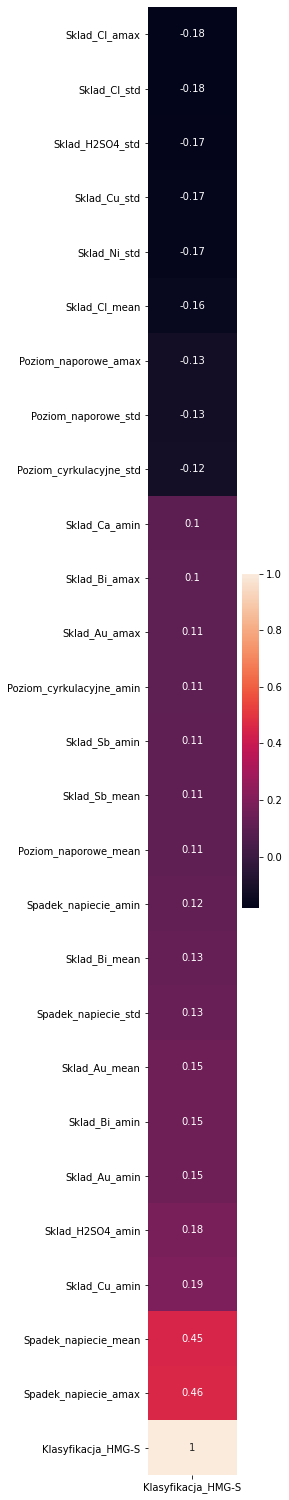

Klasyfikacja_Cu-CATH 1 Z
Index(['Temp_naporowe_amin', 'Temp_naporowe_std', 'Temp_cyrkulacyjne_amin',
       'Temp_cyrkulacyjne_std', 'Poziom_naporowe_amin', 'Poziom_naporowe_amax',
       'Poziom_naporowe_mean', 'Poziom_naporowe_std',
       'Poziom_cyrkulacyjne_amin', 'Poziom_cyrkulacyjne_amax',
       'Poziom_cyrkulacyjne_std', 'Sklad_Au_amin', 'Sklad_Au_mean',
       'Sklad_Au_std', 'Sklad_Sb_amin', 'Sklad_Sb_mean', 'Sklad_Sb_std',
       'Sklad_Bi_amin', 'Sklad_Bi_std', 'Sklad_Ca_amin', 'Sklad_Ca_mean',
       'Sklad_Ca_std', 'Sklad_Fe_amin', 'Sklad_Fe_mean', 'Sklad_Fe_std',
       'Sklad_Ni_amin', 'Sklad_Ni_std', 'Sklad_Zn_std', 'Sklad_H2SO4_amin',
       'Sklad_H2SO4_mean', 'Sklad_H2SO4_std', 'Sklad_Cu_amin', 'Sklad_Cu_std',
       'Sklad_Cl_amax', 'Sklad_Cl_mean', 'Sklad_Cl_std', 'Tiomocznik_std',
       'Klej_std', 'Klasyfikacja_Cu-CATH 1 Z'],
      dtype='object')


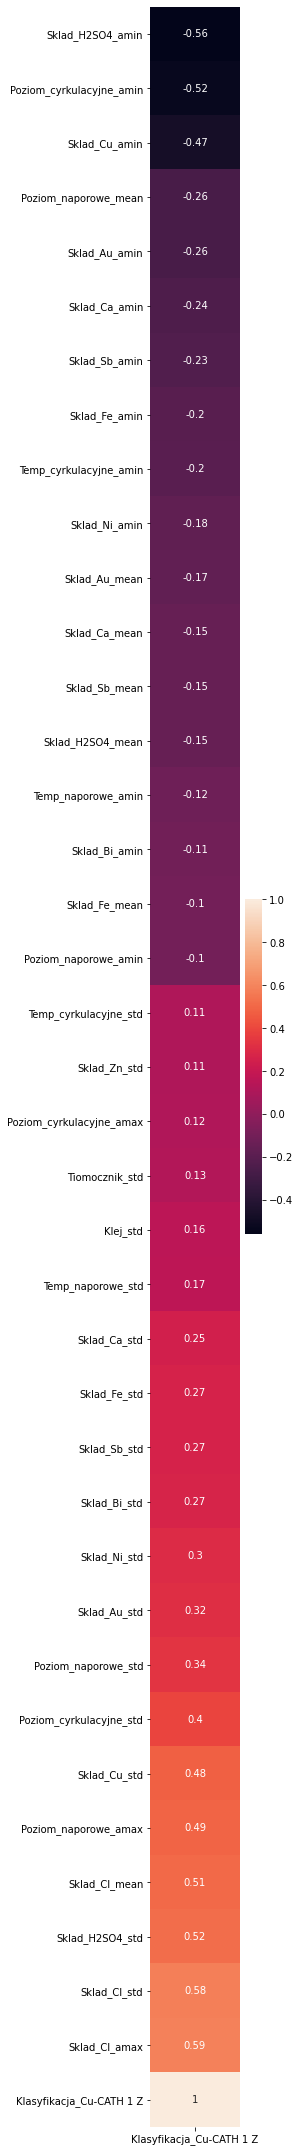

Klasyfikacja_Cu-CATH 2
Index(['NaCl [kg]_amin', 'NaCl [kg]_mean', 'Natezenie_prad_mean',
       'Spadek_napiecie_amax', 'Spadek_napiecie_mean', 'Spadek_napiecie_std',
       'Sklad_Au_amin', 'Sklad_Au_amax', 'Sklad_Au_mean', 'Sklad_Bi_amin',
       'Sklad_Bi_amax', 'Sklad_Bi_mean', 'Sklad_Ni_amin', 'Sklad_Ni_amax',
       'Sklad_Ni_mean', 'Sklad_Ni_std', 'Sklad_Zn_amin', 'Sklad_Zn_amax',
       'Sklad_Zn_mean', 'Klasyfikacja_Cu-CATH 2'],
      dtype='object')


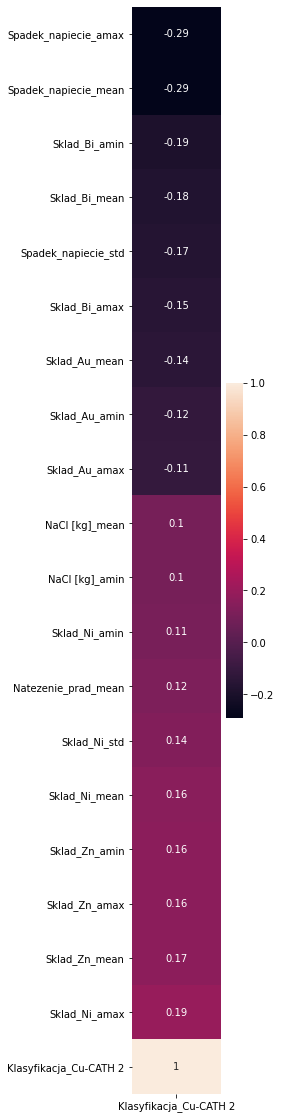

Klasyfikacja_niesklasyfikowane
Index(['Klasyfikacja_niesklasyfikowane'], dtype='object')


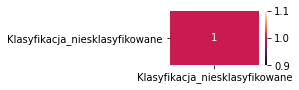

In [33]:
for typ_katod in y_klasyfikacja:
    high_correlations = (
        (process_dataset_aggreagated[process_aggreagated_features+[typ_katod]].corr()[typ_katod]>0.1)|\
        (process_dataset_aggreagated[process_aggreagated_features+[typ_katod]].corr()[typ_katod]<-0.1)
    )
    high_correlations = high_correlations[high_correlations==True].index
    print(typ_katod)
    print(high_correlations)
    plt.figure(figsize = (2, len(high_correlations)))
    sns.heatmap(pd.DataFrame(process_dataset_aggreagated[high_correlations].corr()[typ_katod].sort_values()),
                annot = True)
    plt.yticks(rotation=0)
    plt.show()

### Jakość katod

Katoda_ANALIZA Pb
Index(['Katoda_ANALIZA Pb'], dtype='object')


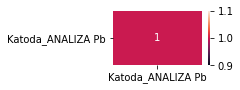

Katoda_ANALIZA Fe
Index(['Katoda_ANALIZA Fe'], dtype='object')


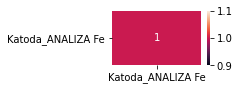

Katoda_ANALIZA Ni
Index(['Katoda_ANALIZA Ni'], dtype='object')


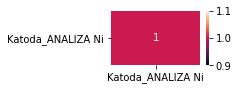

Katoda_ANALIZA Zn
Index(['Kondensat [m3]_amax', 'Kondensat [m3]_std', 'NaCl [kg]_mean',
       'Sklad_Sb_amin', 'Sklad_Sb_amax', 'Sklad_Sb_mean', 'Sklad_Fe_amax',
       'Sklad_Fe_mean', 'Sklad_H2SO4_mean', 'Sklad_Cu_amax', 'Sklad_Cu_mean',
       'Sklad_Cl_amin', 'Tiomocznik_mean', 'NaCl_amin', 'NaCl_amax',
       'NaCl_mean', 'NaCl_std', 'Katoda_ANALIZA Zn'],
      dtype='object')


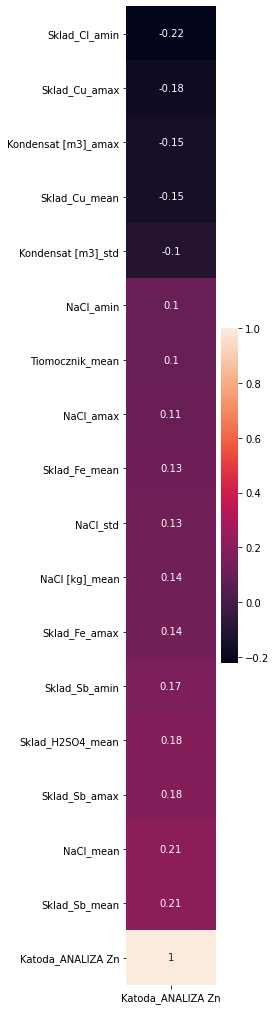

Katoda_ANALIZA S
Index(['Natezenie_prad_amax', 'Natezenie_prad_mean', 'Spadek_napiecie_amin',
       'Sklad_Cu_amin', 'Sklad_Cu_amax', 'Sklad_Cu_mean', 'Tiomocznik_mean',
       'NaCl_mean', 'Klej_amin', 'Katoda_ANALIZA S'],
      dtype='object')


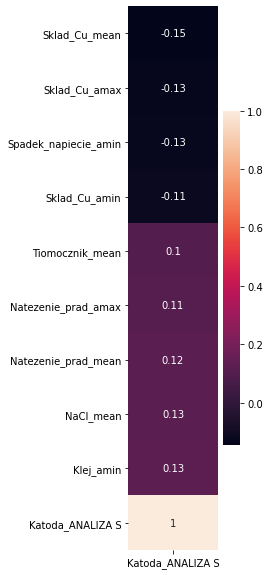

Katoda_ANALIZA Ag
Index(['Temp_naporowe_amax', 'Temp_naporowe_mean', 'kwas [m3]_mean',
       'Elektrolit [m3]_amin', 'NaCl [kg]_amin', 'NaCl [kg]_amax',
       'NaCl [kg]_mean', 'NaCl [kg]_std', 'Spadek_napiecie_amax',
       'Spadek_napiecie_mean', 'Spadek_napiecie_std', 'Sklad_Bi_amin',
       'Sklad_Bi_amax', 'Sklad_Bi_mean', 'Sklad_Ni_amin', 'Sklad_Ni_amax',
       'Sklad_Ni_mean', 'Sklad_Zn_amin', 'Sklad_Zn_amax', 'Sklad_Zn_mean',
       'Sklad_H2SO4_amax', 'Sklad_H2SO4_mean', 'Sklad_Cu_amin',
       'Sklad_Cu_amax', 'Sklad_Cu_mean', 'Sklad_Cl_amin', 'Sklad_Cl_mean',
       'NaCl_amax', 'NaCl_mean', 'NaCl_std', 'Katoda_ANALIZA Ag'],
      dtype='object')


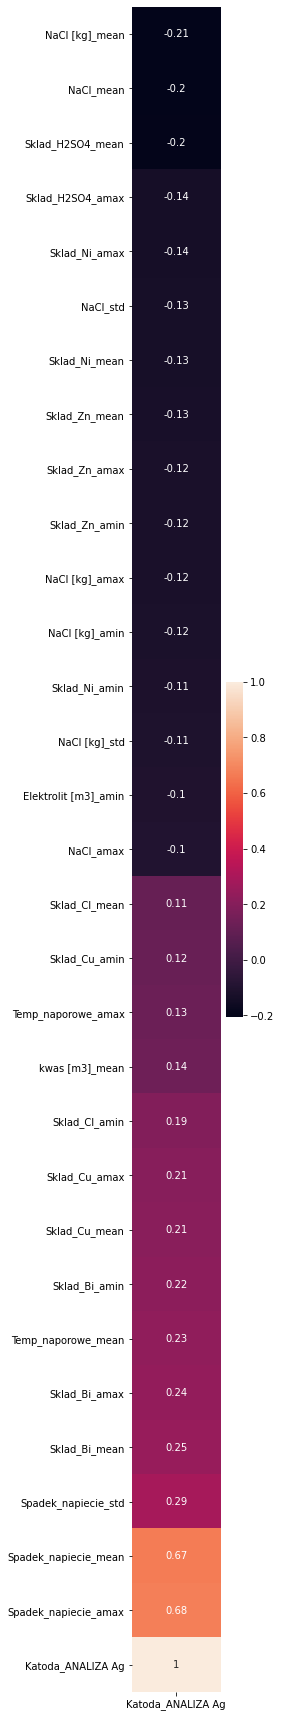

In [34]:
for typ_analiza in y_analiza:
    high_correlations = (
        (process_dataset_aggreagated[process_aggreagated_features+[typ_analiza]].corr()[typ_analiza]>0.1)|\
        (process_dataset_aggreagated[process_aggreagated_features+[typ_analiza]].corr()[typ_analiza]<-0.1)
    )
    high_correlations = high_correlations[high_correlations==True].index
    print(typ_analiza)
    print(high_correlations)
    plt.figure(figsize = (2, len(high_correlations)))
    sns.heatmap(pd.DataFrame(process_dataset_aggreagated[high_correlations].corr()[typ_analiza].sort_values()),
                annot = True)
    plt.yticks(rotation=0)
    plt.show()

### Wyświetlanie poszczególnych parametrów dla historycznej produkcji

In [35]:
print('Parametry do wyboru:')
process_numeric_features

Parametry do wyboru:


['Temp_naporowe',
 'Temp_cyrkulacyjne',
 'Poziom_naporowe',
 'Poziom_cyrkulacyjne',
 'kwas [m3]',
 'Kondensat [m3]',
 'Elektrolit [m3]',
 'NaCl [kg]',
 'Natezenie_prad',
 'Spadek_napiecie',
 'Sklad_Au',
 'Sklad_Sb',
 'Sklad_Bi',
 'Sklad_Ca',
 'Sklad_Fe',
 'Sklad_Ni',
 'Sklad_Zawiesina',
 'Sklad_Zn',
 'Sklad_H2SO4',
 'Sklad_Cu',
 'Sklad_Cl',
 'Tiomocznik',
 'NaCl',
 'Klej']

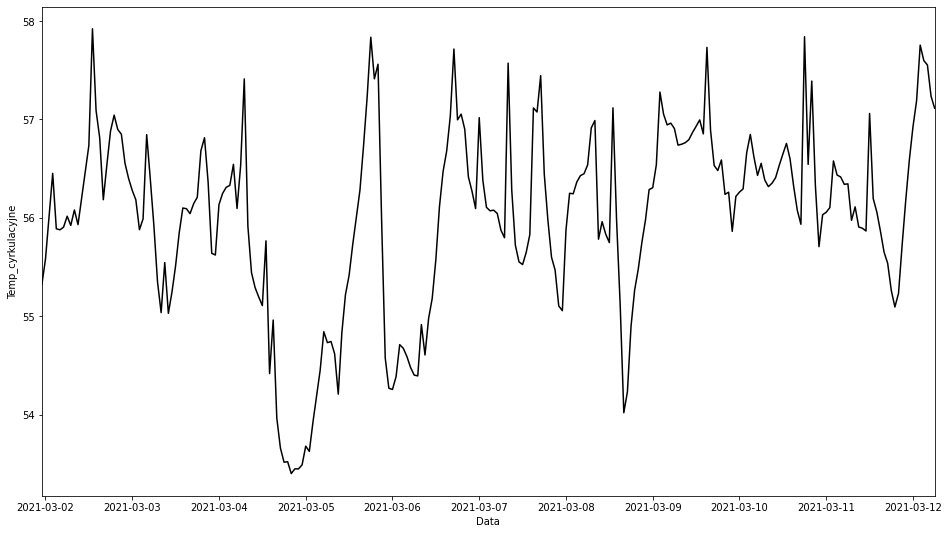

In [36]:
# Parametry do wyboru
index_selected = 5
parameter_selected = 'Temp_cyrkulacyjne'

# Filtrowany dataset

process_dataset_selected = process_dataset.loc[process_dataset['index_process']==index_selected,
                                               ['index_process', 'Data']+process_numeric_features].copy()
plt.figure(figsize=(16, 9))
plt.plot(process_dataset_selected['Data'], process_dataset_selected[parameter_selected], color='black')
plt.xlim([process_dataset_selected['Data'].min(), process_dataset_selected['Data'].max()])
plt.xlabel('Data')
plt.ylabel(parameter_selected)
plt.show()